In [2]:
library(xlsx)
library(ggplot2)
library(RColorBrewer)
library(plyr)
library(dplyr)
library(tidyr)
library(tidyverse)
library(foreach)
library(doParallel)
library(itertools)
library(bigstatsr)
library(bigmemory)
library(scales)
library(viridis)

In [3]:
#download initial data
data <- read.xlsx("data.xlsx", sheetIndex = 1, header = T)
data_psd <- read.xlsx("data.xlsx", sheetIndex = 2, header = T)
data_psd_test <- read.xlsx("data.xlsx", sheetIndex = 3, header = T)
data_meta <- read.xlsx("data.xlsx", sheetIndex = 4, header = T)
data_meta_psd <- read.xlsx("data.xlsx", sheetIndex = 5, header = T)

# delete NA column
data <- data[,1:8]
# join two psd filtes for addition of D500 and D1000 to data_psd and filtration samples, that did not cross to data_psd file
data_psd <- data_psd %>% 
  full_join(data_psd_test)%>% 
  filter(is.na(MVD) %in% F & is.na(soil) %in% F) %>% 
  select(-c(a, b, c)) 
colnames(data_psd)[6:75] <- c(2000,1674,1408,1184,995.5,837.1,703.9,591.9,497.8,418.6,
                              352,296,248.9,209.3,176,148,124.4,104.6,87.99,73.99,62.22,
                              52.32,44,37,31.11,26.16,22,18.5,15.55,13.08,11,9.25,7.78,
                              6.54,5.5,4.62,3.89,3.27,2.75,2.31,1.94,1.64,1.38,1.16,0.972,
                              0.817,0.687,0.578,0.486,0.409,0.344,0.289,0.243,0.204,0.172,
                              0.145,0.122,0.102,0.086,0.072,0.061,0.051,0.043,0.036,0.03,
                              0.0255,0.0215,0.0181,0.0152,0.0128
)

Joining, by = c("X2000", "X1674", "X1408", "X1184", "X995.5", "X837.1", "X703.9", "X591.9", "X497.8", "X418.6", "X352", "X296", "X248.9", "X209.3", "X176", "X148", "X124.4", "X104.6", "X87.99", "X73.99", "X62.22", "X52.32", "X44", "X37", "X31.11", "X26.16", "X22", "X18.5", "X15.55", "X13.08", "X11", "X9.25", "X7.78", "X6.54", "X5.5", "X4.62", "X3.89", "X3.27", "X2.75", "X0.972", "X0.817", "X0.687", "X0.578", "X0.486", "X0.409", "X0.344", "X0.289", "X0.243", "X0.204", "X0.172", "X0.145", "X0.122", "X0.102", "X0.086", "X0.072", "X0.061", "X0.051", "X0.043", "X0.036", "X0.03", "X0.0255", "X0.0215", "X0.0181", "X0.0152", "X0.0128")


Loading required package: nlmrt
Warning message:
"package 'nlmrt' was built under R version 3.6.3"

ID,soil,lu,field,point,depth,a,m,n,df,dmin
1,ch,ar,10,20,20,0.0059086604,2.789452,1.0120722,53.04093,1.28e-05
2,ch,ar,10,20,40,0.0054738757,2.946872,0.9594116,74.21947,1.28e-05
3,ch,ar,10,26,20,0.0049095908,3.039929,0.9561839,71.75373,1.28e-05
4,ch,ar,10,26,40,0.0050578000,2.991639,0.9899528,53.56260,1.28e-05
5,ch,ar,10,32,20,0.0048104884,3.049586,1.0008175,46.81333,1.28e-05
6,ch,ar,10,32,40,0.0050785424,2.885026,1.0166350,43.23017,1.28e-05
7,ch,ar,10,35,20,0.0039428833,3.434547,0.8921993,116.51905,1.28e-05
8,ch,ar,10,35,40,0.0024119782,4.907871,0.7499841,1850.40846,1.28e-05
9,ch,ar,10,40,20,0.0031319824,4.370626,0.7292783,2053.41723,1.28e-05
10,ch,ar,10,40,40,0.0044804996,3.135103,0.9706543,54.69994,1.28e-05


Joining, by = c("ID", "soil", "lu", "field", "point", "depth")


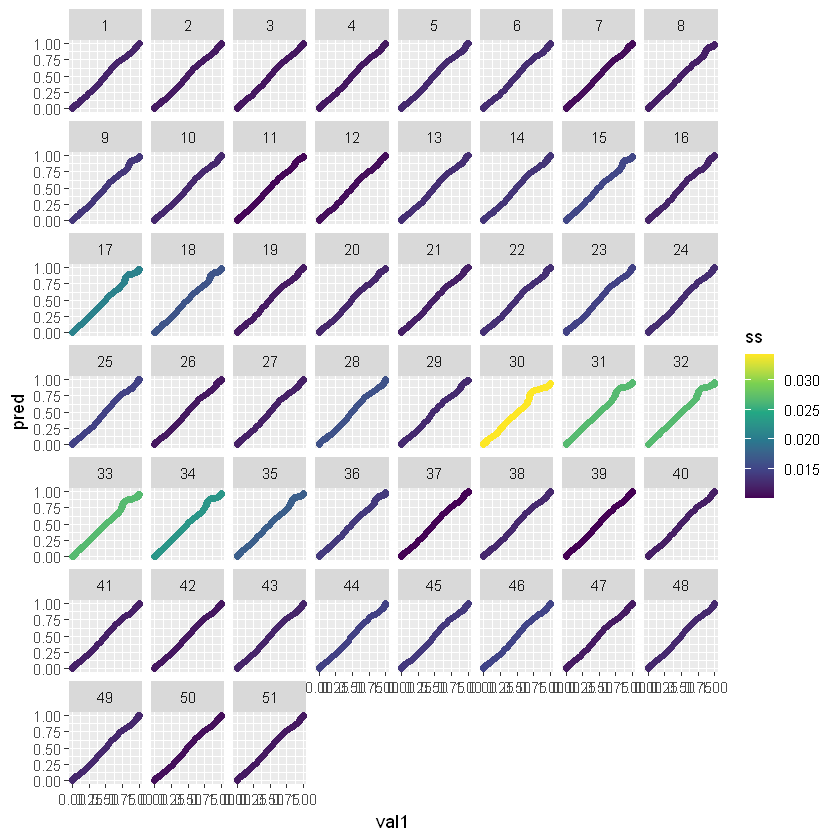

In [4]:
## BIG WORK ON FITTING OF PSD BY 4-PARAMETERS FREDLUND (2000) EQULATION  - FRED4

# MEASURED DATA - MD
# transformation differencial psd distribution to cumulative psd distrubution
data_psd_cumsum <- data.frame(ID = seq(1:nrow(data_psd))) %>% 
  bind_cols(data_psd %>% select(1:75)) %>% 
  gather(D, val, 7:76) %>% 
  mutate(D = as.numeric(as.character(D))/1000,
         val = val / 100) %>%
  arrange(D) %>% 
  arrange(ID) %>% 
  group_by(ID) %>% 
  mutate(val1 = cumsum(val))

# connect library for easy fitting by FRED4
library(vadose)

# calculate FRED4 parameters for MD
# start parameters of fitting a = 0.0001, n = 1, m = 5, df = 100
data_psd_fred4_it1 <- data_psd_cumsum %>% 
  group_by(ID,soil, lu, field, point, depth) %>% 
  do(a = coef(fredlund4(D = "D", fr = "val1", p = 1, data = ., a = 0.0001, n = 1, m = 5, df = 100))[[1]],
     m = coef(fredlund4(D = "D", fr = "val1", p = 1, data = ., a = 0.0001, n = 1, m = 5, df = 100))[[2]],
     n = coef(fredlund4(D = "D", fr = "val1", p = 1, data = ., a = 0.0001, n = 1, m = 5, df = 100))[[3]],
     df = coef(fredlund4(D = "D", fr = "val1", p = 1, data = ., a = 0.0001, n = 1, m = 5, df = 100))[[4]]) %>% 
  as.data.frame() %>% 
  mutate(a = as.numeric(as.character(a)),
         m = as.numeric(as.character(m)),
         n = as.numeric(as.character(n)),
         df = as.numeric(as.character(df)),
         dmin = 0.0128/1000)

data_psd_fred4_it1

# test fitting quality of MD
data_psd_cumsum %>% 
  full_join(data_psd_fred4_it1) %>%
  group_by(ID) %>% 
  mutate(D = D,
         pred = (1/((log(exp(1)+(a/D)^n)^m)))*(1-((log(1+df/D)/(log(1+df /dmin)))^7)),
        ss = sigma(lm(val1 ~ pred))) %>% 
  ggplot()+
  geom_point(aes(x = val1, y = pred, col = ss))+
  scale_colour_viridis_c()+
  facet_wrap(~ID)

Joining, by = c("ID", "soil", "lu", "field", "point", "depth")


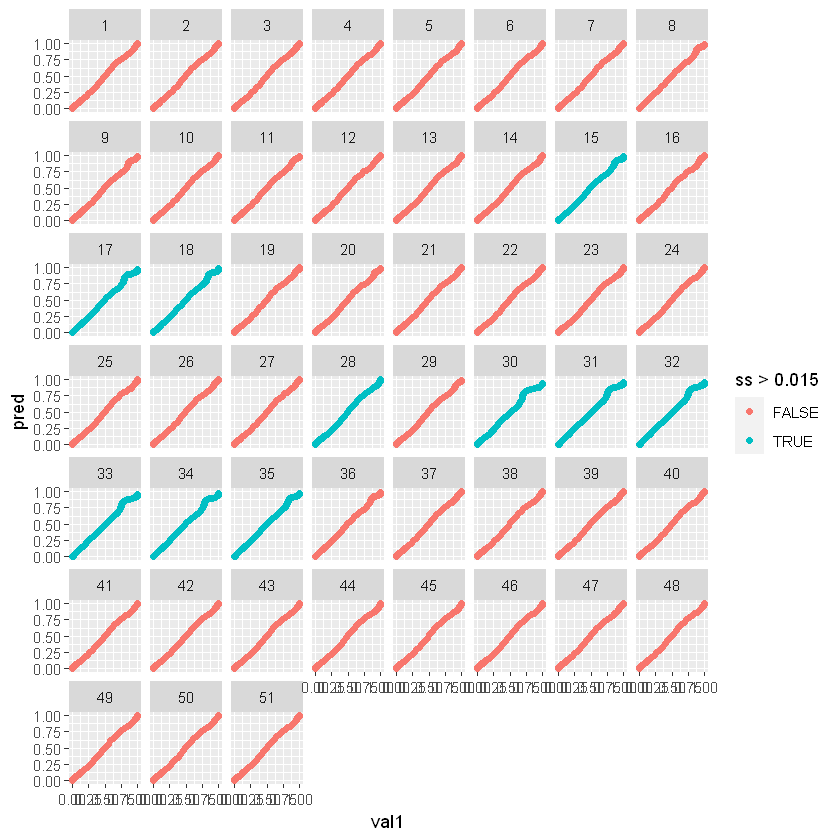

In [5]:
data_psd_cumsum %>% 
  full_join(data_psd_fred4_it1) %>%
  group_by(ID) %>% 
  mutate(D = D,
         pred = (1/((log(exp(1)+(a/D)^n)^m)))*(1-((log(1+df/D)/(log(1+df /dmin)))^7)),
        ss = sigma(lm(val1 ~ pred))) %>% 
  ggplot()+
  geom_point(aes(x = val1, y = pred, col = ss > 0.015))+
  facet_wrap(~ID)

# after obervation of fitting parameters, we selecter samples with sigma > 0.015 as bad fitted with default start parameters
# bad fitted samples is ID = 15, 17, 18, 28, 30, 31, 32, 33, 34, 35

ID,soil,lu,field,point,depth,a,m,n,df,dmin
15,ch,ar,10,49,20,0.0032249878,4.460544,0.7270965,2890.37686,1.28e-05
17,ch,ar,10,52,20,0.0018426190,5.874843,0.6340830,16048.69288,1.28e-05
18,ch,ar,10,52,40,0.0025212340,4.886684,0.6904170,4917.43345,1.28e-05
28,ch,ar,11,11,40,0.0056765228,2.465994,1.1098669,26.55781,1.28e-05
30,ch,ar,11,13,40,0.0054880032,4.019983,0.5670029,66689.36407,1.28e-05
31,ch,ar,11,14,20,0.0001617414,18.343657,0.5415906,190648.59349,1.28e-05
32,ch,ar,11,14,20,0.0001617414,18.343657,0.5415906,190648.59349,1.28e-05
33,ch,ar,11,14,20,0.0001617414,18.343657,0.5415906,190648.59349,1.28e-05
34,ch,ar,11,14,40,0.0020355491,5.640011,0.6210299,23017.81950,1.28e-05
35,ch,ar,11,18,20,0.0017402474,6.050084,0.6687543,9406.81386,1.28e-05


Joining, by = c("ID", "soil", "lu", "field", "point", "depth")


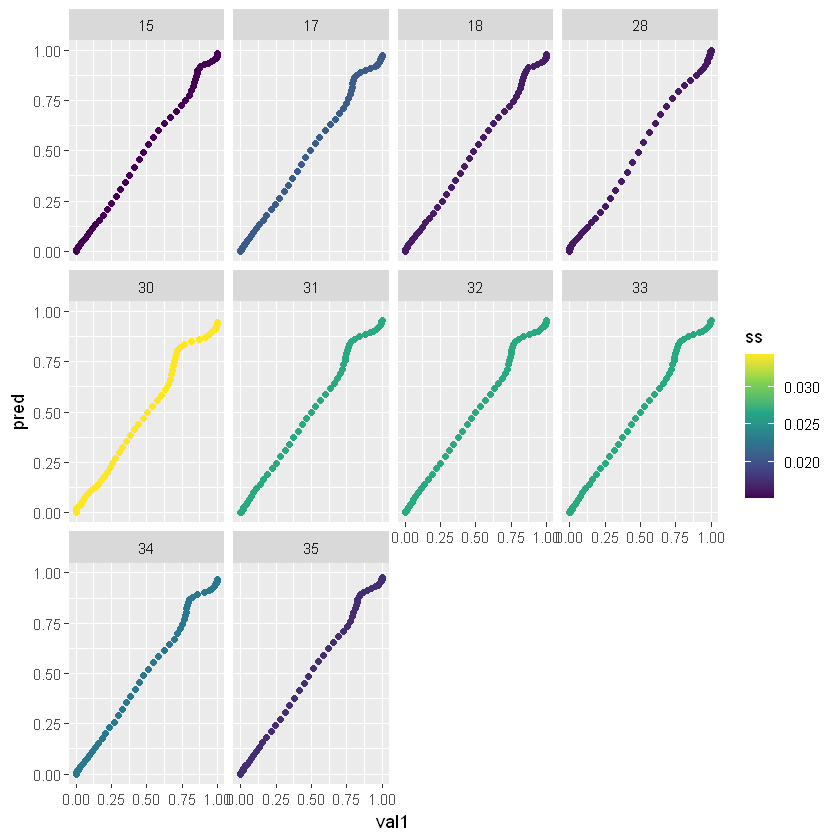

In [6]:
# after first calc ittration sanples ID = 15, 17, 18, 28, 30, 31, 32, 33, 34, 35 were fitted with unsufficient quality 
# SECOND itteration of MD samples fitting
# calculate FRED4 parameters for MD 
data_psd_fred4_it2 <- data_psd_cumsum %>% 
  filter(ID %in% c(15, 17, 18, 28, 30, 31, 32, 33, 34, 35)) %>% 
  group_by(ID,soil, lu, field, point, depth) %>% 
  do(a = coef(fredlund4(D = "D", fr = "val1", p = 1.5, data = ., a = 10, n = 0.1, m = 0.1, df = 100))[[1]],
     m = coef(fredlund4(D = "D", fr = "val1", p = 1.5, data = ., a = 10, n = 0.1, m = 0.1, df = 100))[[2]],
     n = coef(fredlund4(D = "D", fr = "val1", p = 1.5, data = ., a = 10, n = 0.1, m = 0.1, df = 100))[[3]],
     df = coef(fredlund4(D = "D", fr = "val1", p = 1.5, data = ., a = 10, n = 0.1, m = 0.1, df = 100))[[4]]) %>% 
  as.data.frame() %>% 
  mutate(a = as.numeric(as.character(a)),
         m = as.numeric(as.character(m)),
         n = as.numeric(as.character(n)),
         df = as.numeric(as.character(df)),
         dmin = 0.0128 / 1000)

data_psd_fred4_it2
# test fitting quality of MD 
data_psd_cumsum %>% 
  filter(ID %in% c(15, 17, 18, 28, 30, 31, 32, 33, 34, 35)) %>% 
  full_join(data_psd_fred4_it2) %>%
  mutate(D = D,
         pred = (1 / ((log(exp(1) + (a / D) ^ n) ^ m))) * (1 - ((log(1 + df / D) / (log(1 + df / dmin))) ^ 7)),
        ss = sigma(lm(val1 ~ pred))) %>% 
  ggplot()+
  geom_point(aes(x = val1, y = pred, col = ss ))+
  scale_colour_viridis_c()+
  facet_wrap(~ID)

In [7]:
# after second ittreation we did not improve fitting quality
# therefore the basis version of fitting paramaters is data_psd_fred4_it1
data_psd_fred4 <- data_psd_fred4_it1

Joining, by = "id"


id,a,m,n,df,dmin
X111,3.394470e-02,2.160899e+00,1.2127709,1.024464e+02,1.025192e-04
X112,2.270019e-02,2.340424e+00,1.1429331,8.252568e+01,1.025192e-04
X113,3.651103e-02,2.212135e+00,1.0285090,3.266330e+02,1.025192e-04
X114,2.156805e-07,4.580698e+02,0.4904932,3.016045e+00,1.035390e-04
X115,2.047291e-02,2.233989e+00,1.1553926,6.652055e+01,1.035390e-04
X116,4.521489e-04,2.804311e+01,0.4748796,4.161361e+00,1.035390e-04
X15,4.746434e-03,4.010829e+00,1.3100235,8.124556e+00,1.000000e-03
X16,1.412783e-02,2.224100e+00,1.3554313,8.942457e+00,1.000000e-03
X17,6.901124e-03,2.365075e+00,1.4245136,3.735720e+00,1.000000e-03
X18,2.007932e-02,1.733826e+00,1.6015370,5.143443e+00,1.000000e-03


Joining, by = "id"


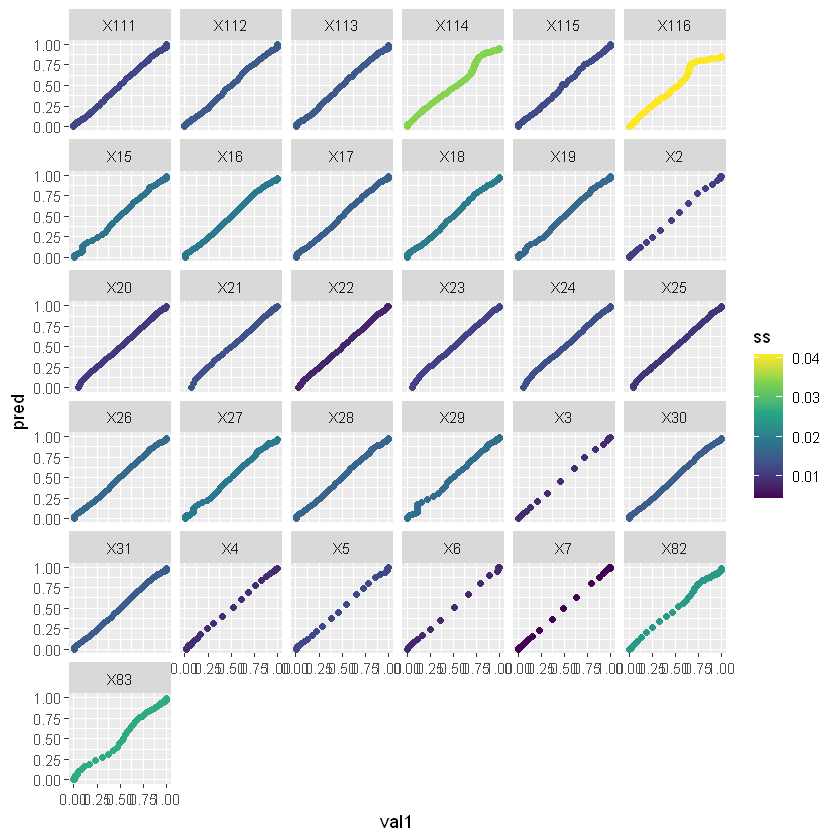

In [8]:
# META-ANALYSIS DATA - MaD
# calculation FRED4 paramaterd for MAD with long psd - MaDlong
# FIRST itteration 
# start paramater values - a = 0.01, n = 1, m = 1, df = 10
data_meta_psd_fred4_it1 <- data_meta_psd %>% 
  mutate(D = D / 1000,
        val1 = val1 / 100) %>% 
  group_by(id) %>% 
  do(a = coef(fredlund4(D = "D", fr = "val1", p = 1, data = ., a = 0.01, n = 1, m = 5, df = 100))[[1]],
     m = coef(fredlund4(D = "D", fr = "val1", p = 1, data = ., a = 0.01, n = 1, m = 5, df = 100))[[2]],
     n = coef(fredlund4(D = "D", fr = "val1", p = 1, data = ., a = 0.01, n = 1, m = 5, df = 100))[[3]],
     df = coef(fredlund4(D = "D", fr = "val1", p = 1, data = ., a = 0.01, n = 1, m = 5, df = 100))[[4]]) %>% 
  as.data.frame() %>% 
  mutate(a = as.numeric(as.character(a)),
         m = as.numeric(as.character(m)),
         n = as.numeric(as.character(n)),
         df = as.numeric(as.character(df)))

# add dmin parameter
data_meta_psd_fred4_it1 <- data_meta_psd_fred4_it1  %>% full_join(data_meta_psd %>% 
                                                          group_by(id) %>% 
                                                          mutate(dmin = min(D) / 1000) %>%
                                                          slice(1) %>% 
                                                          select(id, dmin))
#print table
data_meta_psd_fred4_it1

# test fitting quality of MD 
data_meta_psd %>% 
  full_join(data_meta_psd_fred4_it1) %>%
  group_by(id) %>% 
  mutate(D = D / 1000,
         val1 = val1 / 100, 
         pred = (1 / ((log(exp(1) + (a / D) ^ n) ^ m))) * (1 - ((log(1 + df / D)/(log(1 + df / dmin))) ^ 7)),
        ss = sigma(lm(val1 ~ 0 + pred))) %>% 
  ggplot()+
  geom_point(aes(x = val1, y = pred, col = ss))+
  scale_colour_viridis_c()+
  facet_wrap(~id)

Joining, by = "id"


id,a,m,n,df,dmin
X114,2.153054e-07,4.584615e+02,0.4904932,3.015286e+00,1.035390e-04
X116,4.521040e-04,2.804435e+01,0.4748793,4.159948e+00,1.035390e-04
X15,4.746439e-03,4.010821e+00,1.3100245,8.124700e+00,1.000000e-03
X18,2.007932e-02,1.733825e+00,1.6015373,5.143489e+00,1.000000e-03
X19,5.344177e-03,3.973861e+00,1.3284272,7.261588e+00,1.000000e-03
X26,9.374502e-03,2.241124e+00,1.4170443,4.877638e+00,1.000000e-03
X27,5.628118e-03,3.653219e+00,1.2264717,1.137824e+01,1.000000e-03
X28,4.881585e-03,3.421569e+00,1.3333986,5.325112e+00,1.000000e-03
X29,4.810547e-03,3.666468e+00,1.5380443,3.807931e+00,1.000000e-03
X82,1.163268e-04,7.842952e+00,2.3421779,7.598975e+05,1.034213e-05


Joining, by = "id"


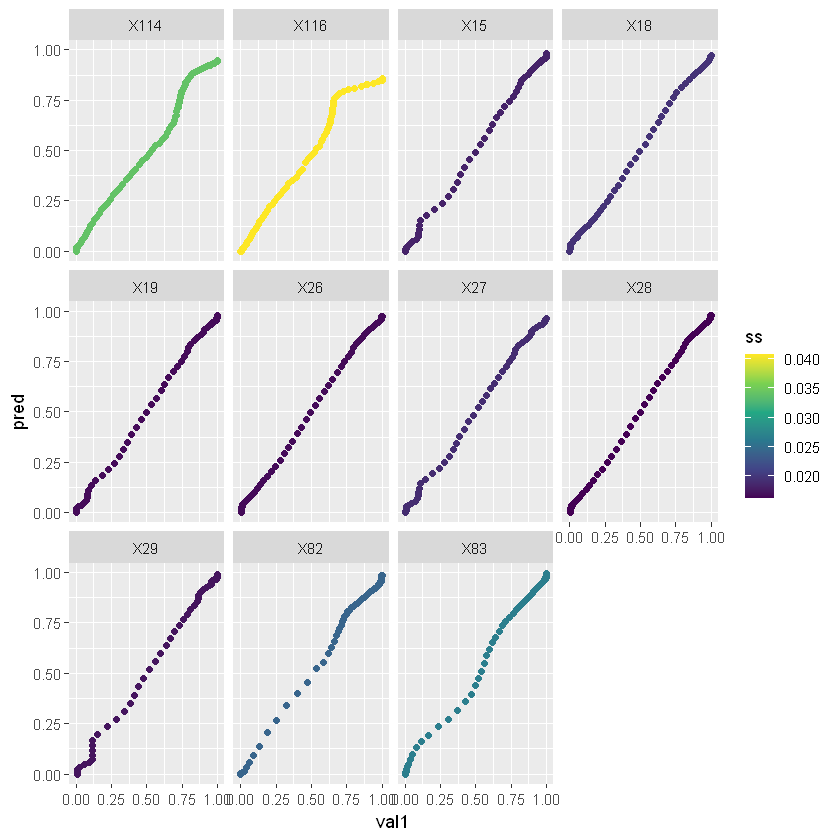

In [9]:
# after first ittreation of MaDlong fitting, sample with sigma > 0.015 is 
# id = "X114", "X116", "X15", "X15", "X18", "X19", "X26", "X27", "X28", "X29", "X82", "X83"
# we try recalculate these sample with new start parameters
# second iteration of fitting MaDlong
data_meta_psd_fred4_it2 <- data_meta_psd %>% 
  filter(id %in% c("X114", "X116", "X15", "X15", "X18", "X19", "X26", "X27", "X28", "X29", "X82", "X83")) %>% 
  mutate(D = D / 1000,
        val1 = val1 / 100) %>% 
  group_by(id) %>% 
  do(a = coef(fredlund4(D = "D", fr = "val1", p = 1, data = ., a = 0.01, n = 1, m = 0.5, df = 100))[[1]],
     m = coef(fredlund4(D = "D", fr = "val1", p = 1, data = ., a = 0.01, n = 1, m = 0.5, df = 100))[[2]],
     n = coef(fredlund4(D = "D", fr = "val1", p = 1, data = ., a = 0.01, n = 1, m = 0.5, df = 100))[[3]],
     df = coef(fredlund4(D = "D", fr = "val1", p = 1, data = ., a = 0.01, n = 1, m = 0.5, df = 100))[[4]]) %>% 
  as.data.frame() %>% 
  mutate(a = as.numeric(as.character(a)),
         m = as.numeric(as.character(m)),
         n = as.numeric(as.character(n)),
         df = as.numeric(as.character(df)))

# add dmin parameter
data_meta_psd_fred4_it2 <- data_meta_psd_fred4_it2  %>% 
full_join(data_meta_psd %>% 
          filter(id %in% c("X114", "X116", "X15", "X15", 
                           "X18", "X19", "X26", "X27", 
                           "X28", "X29", "X82", "X83")) %>% 
          group_by(id) %>% 
          mutate(dmin = min(D) / 1000) %>%
          slice(1) %>% 
          select(id, dmin))

#print table
data_meta_psd_fred4_it2

# test fitting quality of MD 
data_meta_psd %>% 
  filter(id %in% c("X114", "X116", "X15", "X15", "X18", 
                   "X19", "X26", "X27", "X28", "X29", "X82", "X83")) %>% 
  full_join(data_meta_psd_fred4_it2) %>%
  group_by(id) %>% 
  mutate(D = D / 1000,
         val1 = val1 / 100, 
         pred = (1 / ((log(exp(1) + (a / D) ^ n) ^ m))) * (1 - ((log(1 + df / D)/(log(1 + df / dmin))) ^ 7)),
        ss = sigma(lm(val1 ~ 0 + pred))) %>% 
  ggplot()+
  geom_point(aes(x = val1, y = pred, col = ss))+
  scale_colour_viridis_c()+
  facet_wrap(~id)

In [10]:
# the quality of the fitting has not been improved.
# we evaluate the idea of discarding samples with ss > 0.03
data_meta_psd_fred4 <- data_meta_psd_fred4_it1

The following `from` values were not present in `x`: Sa_20, Sa_50, Sa_75, CL_4, CL_5, Si_2_20, Si_2_50, Si_4_63, Si_5_75, Si_2_75
The following `from` values were not present in `x`: Sa_20, Sa_50, Sa_75, CL_2, CL_5, Si_2_20, Si_2_50, Si_2_63, Si_5_75, Si_2_75
The following `from` values were not present in `x`: Sa_20, Sa_50, Sa_75, CL_4, CL_5, Si_2_20, Si_2_50, Si_4_63, Si_5_75, Si_2_75
The following `from` values were not present in `x`: Sa_20, Sa_50, Sa_75, CL_4, CL_5, Si_2_20, Si_2_50, Si_4_63, Si_5_75, Si_2_75
The following `from` values were not present in `x`: Sa_20, Sa_50, Sa_75, CL_4, CL_5, Si_2_20, Si_2_50, Si_4_63, Si_5_75, Si_2_75
The following `from` values were not present in `x`: Sa_20, Sa_50, Sa_75, CL_4, CL_5, Si_2_20, Si_2_50, Si_4_63, Si_5_75, Si_2_75
The following `from` values were not present in `x`: Sa_20, Sa_50, Sa_75, CL_4, CL_5, Si_2_20, Si_2_50, Si_4_63, Si_5_75, Si_2_75
The following `from` values were not present in `x`: Sa_20, Sa_50, Sa_75, CL_4, CL_5, Si_2

The following `from` values were not present in `x`: Sa_50, Sa_63, Sa_75, CL_4, CL_5, Si_2_50, Si_4_63, Si_2_63, Si_5_75, Si_2_75
The following `from` values were not present in `x`: Sa_20, Sa_50, Sa_75, CL_4, CL_5, Si_2_20, Si_2_50, Si_4_63, Si_5_75, Si_2_75
The following `from` values were not present in `x`: Sa_50, Sa_63, Sa_75, CL_4, CL_5, Si_2_50, Si_4_63, Si_2_63, Si_5_75, Si_2_75
The following `from` values were not present in `x`: Sa_50, Sa_63, Sa_75, CL_4, CL_5, Si_2_50, Si_4_63, Si_2_63, Si_5_75, Si_2_75
The following `from` values were not present in `x`: Sa_50, Sa_63, Sa_75, CL_4, CL_5, Si_2_50, Si_4_63, Si_2_63, Si_5_75, Si_2_75
The following `from` values were not present in `x`: Sa_50, Sa_63, Sa_75, CL_4, CL_5, Si_2_50, Si_4_63, Si_2_63, Si_5_75, Si_2_75
The following `from` values were not present in `x`: Sa_50, Sa_63, Sa_75, CL_4, CL_5, Si_2_50, Si_4_63, Si_2_63, Si_5_75, Si_2_75
The following `from` values were not present in `x`: Sa_50, Sa_63, Sa_75, CL_4, CL_5, Si_2

The following `from` values were not present in `x`: Sa_20, Sa_50, Sa_75, CL_4, CL_5, Si_2_20, Si_2_50, Si_4_63, Si_5_75, Si_2_75
The following `from` values were not present in `x`: Sa_20, Sa_50, Sa_75, CL_4, CL_5, Si_2_20, Si_2_50, Si_4_63, Si_5_75, Si_2_75
The following `from` values were not present in `x`: Sa_20, Sa_50, Sa_75, CL_4, CL_5, Si_2_20, Si_2_50, Si_4_63, Si_5_75, Si_2_75


D,X1,X10,X100,X101,X102,X103,X104,X105,X106,...,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99
0.002,0.1033,NA,0.0092,0.2268,0.2386,0.1420,0.2146,0.1461,0.1626,...,0.2285,0.1964,0.2339,0.2031,0.182,0.1857,0.2225,0.2218,0.1267,0.0952
0.004,NA,0.83,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0.020,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0.050,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0.063,0.9989,0.92,0.0747,0.9882,0.9851,0.9774,0.9937,0.9926,0.9901,...,0.9899,0.9965,0.9969,0.9868,0.999,0.9989,0.9966,0.9950,0.8950,0.7151
2.000,0.9999,1.00,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.000,0.9999,1.0000,1.0000,1.0000,1.0000


Joining, by = "id"


id,a,m,n,df,dmin
X1,0.00000000,0.0000000,0.000000,0.000000000,0.001
X10,0.04934136,0.8459840,4.972553,0.009990788,0.002
X100,0.20493361,1.4397940,5.132811,0.010002630,0.001
X101,0.03291824,0.8240872,4.969553,0.010000739,0.001
X102,0.03453070,0.8249948,4.969704,0.010001213,0.001
X103,0.03763129,0.8274080,4.970041,0.009999746,0.001
X104,0.02896771,0.8224653,4.969282,0.010000051,0.001
X105,0.02993049,0.8227931,4.969335,0.010000143,0.001
X106,0.03175798,0.8235722,4.969439,0.010000490,0.001
X107,0.03232742,0.8238160,4.969494,0.010000607,0.001


Joining, by = "id"


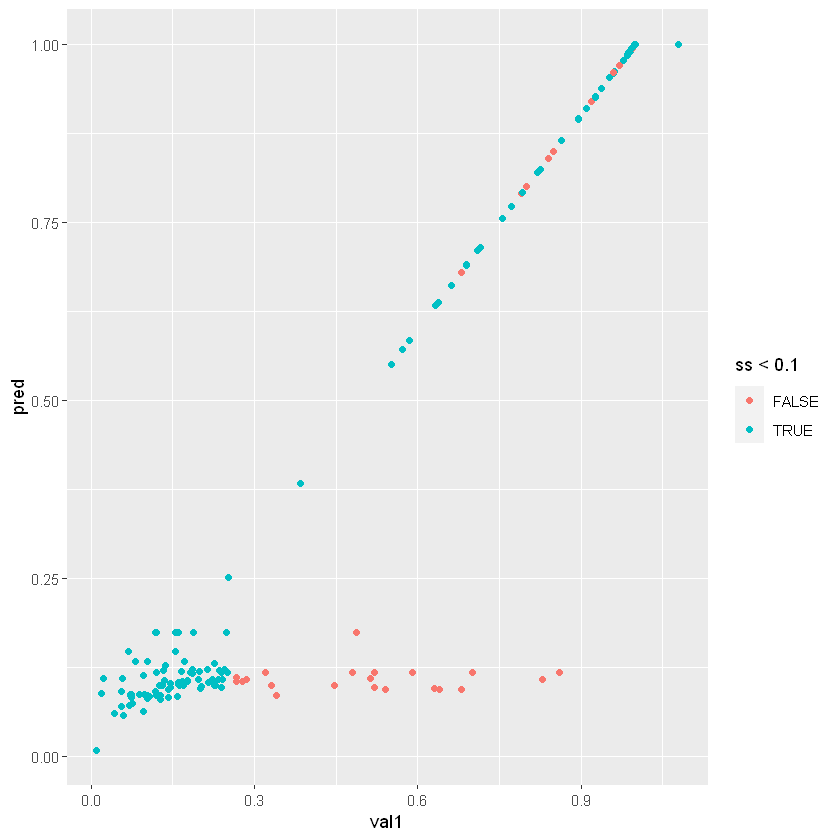

In [11]:
# next step is fitting meta-analysis data with short psd - MaDshort

# transform file woth named particle size fractions to numeric sized and delete samples that duplite samples of MaDlong
data_meta_psd_short <- data_meta %>% 
  select(id, soil, point, 4:16)  %>%  
  gather(var, val, 4:16) %>% 
  filter(is.na(val) %in% FALSE) %>% 
  group_by(id, soil, point) %>% 
  mutate(D = as.numeric(as.character(revalue(var, c(Sa_20 = 2000, Sa_50 = 2000, Sa_63 = 2000, Sa_75 = 2000,
                                                                  CL_2 = 2, CL_4 = 4, CL_5 = 5, Si_2_20 = 20, Si_2_50 = 50,
                                                                  Si_4_63 = 63, Si_2_63 = 63, Si_5_75 = 75, Si_2_75 = 75)))),
        D = D / 1000) %>% 
  arrange(D) %>% 
  mutate(val = val / 100,
         val1 = cumsum(val),
         val1 = ifelse(D %in% 1, 1, val1)) %>% 
  ungroup() %>% 
  select(id, D, val, val1) %>%
  arrange(id)  %>% 
  filter(!id %in% unique(data_meta_psd$id))

# transform one column varible to matrix
data_meta_psd_short_matrix <- data_meta_psd_short %>%
  select(-val) %>%
  spread(id, val1) %>%
  as.data.frame()

data_meta_psd_short_matrix

# create blank file with FRED4 paramerets
data_meta_psd_short_fred4_it1 <- data.frame(id = data_meta_psd_short %>% 
                                group_by(id) %>% 
                                slice(1) %>% 
                                select(id) %>% 
                                as.data.frame(),
                              a = rep(0, times = ncol(data_meta_psd_short_matrix)-1),
                              m = rep(0, times = ncol(data_meta_psd_short_matrix)-1),
                              n = rep(0, times = ncol(data_meta_psd_short_matrix)-1),
                              df = rep(0, times = ncol(data_meta_psd_short_matrix)-1))

# function for calculation of Fredlund equation parameters
# NOTE! start fitting parameters - a = 0.1, n = 5, m = 1, df = 0.01
for (i in 2:ncol(data_meta_psd_short_matrix)) {
  tryCatch({
    dd = data.frame(D = c(0.002, 0.004, 0.020, 0.050, 0.063, 2.000),
                    fr = data_meta_psd_short_matrix[,i+1]) %>% filter(is.na(fr) %in% FALSE)
    fit = fredlund4(D = "D", fr = "fr", p = 1, data = dd, a = 0.1, n = 5, m = 1, df = 0.01)
    rownames(data_meta_psd_short_fred4_it1)[i] <- colnames(data_meta_psd_short_matrix)[i+1]
    fit_coef <- coef(fit)
    data_meta_psd_short_fred4_it1[i,]$a <- fit_coef[[1]]
    data_meta_psd_short_fred4_it1[i,]$m <- fit_coef[[2]]
    data_meta_psd_short_fred4_it1[i,]$n <- fit_coef[[3]]
    data_meta_psd_short_fred4_it1[i,]$df <- fit_coef[[4]]
  }, error=function(e) {
    data_meta_psd_short_fred4_it1[i,]$a <- 0
    data_meta_psd_short_fred4_it1[i,]$m <- 0
    data_meta_psd_short_fred4_it1[i,]$n <- 0
    data_meta_psd_short_fred4_it1[i,]$df <- 0
  }
  )
}

# add dmin parameter
data_meta_psd_short_fred4_it1 <- data_meta_psd_short_fred4_it1  %>% full_join(data_meta_psd_short %>% 
                                                          group_by(id) %>% 
                                                          mutate(dmin = min(D)/2) %>%
                                                          slice(1) %>% 
                                                          select(id, dmin))

#print table
data_meta_psd_short_fred4_it1

# test fitting quality of MaDshort - 1-st itteration
data_meta_psd_short %>% 
  full_join(data_meta_psd_short_fred4_it1) %>%
  filter(!a %in% 0) %>% 
  group_by(id) %>% 
  mutate(pred = (1 / ((log(exp(1) + (a / D) ^ n) ^ m))) * (1 - ((log(1 + df / D)/(log(1 + df / dmin))) ^ 7)),
         ss = sigma(lm(val1 ~ 0 + pred))) %>% 
  ggplot()+
  geom_point(aes(x = val1, y = pred, col = ss < 0.1))


In [12]:
# select samples with very good fitting ss < 0.1
data_meta_psd_short_fred4_it1_goodlist <- c(data_meta_psd_short %>% 
                                                full_join(data_meta_psd_short_fred4_it1) %>%
                                                filter(is.na(a) %in% F & a > 0) %>% 
                                                group_by(id) %>% 
                                                mutate(pred = (1 / ((log(exp(1) + (a / D) ^ n) ^ m))) * (1 - ((log(1 + df / D)/(log(1 + df / dmin))) ^ 7)),
                                                       ss = sigma(lm(val1 ~ 0 + pred)))  %>% 
                                                filter(ss < 0.1) %>% 
                                                slice(1) %>% 
                                                select(id))$id

data_meta_psd_short_fred4_it1_goodlist
data_meta_psd_short_fred4_it1_goodlist %>% length

# binding good fitted samples after 1-st itteration
data_meta_psd_short_fred4 <- data_meta_psd_short_fred4_it1 %>% filter(id %in% data_meta_psd_short_fred4_it1_goodlist)
data_meta_psd_short_fred4

Joining, by = "id"


[1] X100 X101 X102 X103 X104 X105 X106 X107 X109 X110 X120 X121 X124 X128 X129
[16] X130 X131 X32  X33  X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44 
[31] X45  X46  X47  X48  X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  X59 
[46] X60  X61  X62  X63  X64  X65  X66  X67  X68  X69  X70  X71  X73  X74  X76 
[61] X77  X78  X79  X80  X81  X85  X88  X89  X90  X91  X92  X93  X94  X95  X96 
[76] X97  X98  X99 
131 Levels: X1 X10 X100 X101 X102 X103 X104 X105 X106 X107 X108 X109 ... X99

[1] 78

id,a,m,n,df,dmin
X100,0.204933611,1.4397940,5.132811,0.010002630,0.001
X101,0.032918239,0.8240872,4.969553,0.010000739,0.001
X102,0.034530702,0.8249948,4.969704,0.010001213,0.001
X103,0.037631287,0.8274080,4.970041,0.009999746,0.001
X104,0.028967709,0.8224653,4.969282,0.010000051,0.001
X105,0.029930490,0.8227931,4.969335,0.010000143,0.001
X106,0.031757984,0.8235722,4.969439,0.010000490,0.001
X107,0.032327425,0.8238160,4.969494,0.010000607,0.001
X109,0.057818015,0.8267174,4.972216,0.285094692,0.001
X110,0.054611012,0.8991458,4.978873,0.010260388,0.001


Note: Using an external vector in selections is ambiguous.
i Use `all_of(data_meta_psd_short_fred4_it1_goodlist)` instead of `data_meta_psd_short_fred4_it1_goodlist` to silence this message.
i See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.
Joining, by = "id"


id,a,m,n,df,dmin
X1,0.000000e+00,0.00000000,0.0000000,0.000000e+00,0.001
X10,4.819646e-02,0.60507744,3.1266041,1.187474e-02,0.002
X108,2.731130e-02,0.24079721,3.4609833,6.630581e-05,0.001
X11,6.088992e-02,0.97408225,4.5614171,1.107156e-02,0.002
X117,1.068294e-02,0.13262086,2.1865648,2.609911e-02,0.001
X118,1.072719e-02,0.13271404,2.1921030,2.597108e-02,0.001
X119,1.068311e-02,0.13262094,2.1865670,2.573782e-02,0.001
X12,6.018120e-02,0.96507654,4.6679432,1.111335e-02,0.002
X122,1.068278e-02,0.13262076,2.1865610,2.640981e-02,0.001
X123,1.068352e-02,0.13262122,2.1865765,2.490259e-02,0.001


Joining, by = "id"


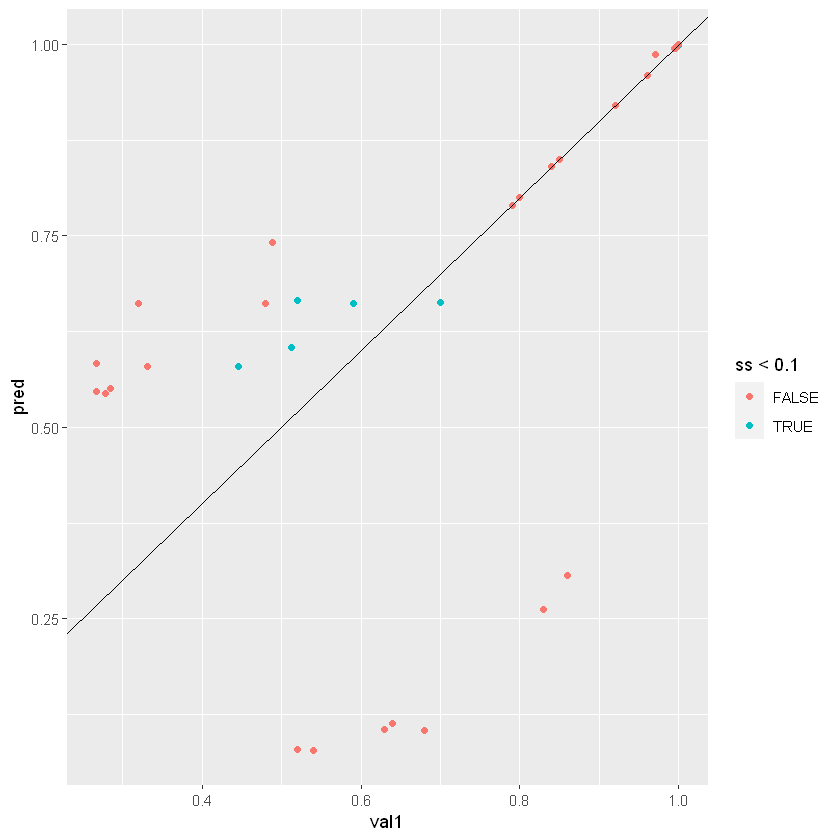

In [13]:
# recalculate bad fitted samples with new start parameters

# SECOND itteration of fitting MaDshort 
# create blank file with FRED4 paramerets
data_meta_psd_short_fred4_it2 <- data.frame(id = data_meta_psd_short %>% 
                                            filter(!id %in% data_meta_psd_short_fred4_it1_goodlist) %>% 
                                            group_by(id) %>% 
                                            slice(1) %>% 
                                            select(id) %>% 
                                            as.data.frame(),
                                            a = rep(0, times = ncol(select(data_meta_psd_short_matrix,
                                                                  -data_meta_psd_short_fred4_it1_goodlist))-1),
                                            m = rep(0, times = ncol(select(data_meta_psd_short_matrix,
                                                                  -data_meta_psd_short_fred4_it1_goodlist))-1),
                                            n = rep(0, times = ncol(select(data_meta_psd_short_matrix,
                                                                  -data_meta_psd_short_fred4_it1_goodlist))-1),
                                            df = rep(0, times = ncol(select(data_meta_psd_short_matrix,
                                                                  -data_meta_psd_short_fred4_it1_goodlist))-1))

# function for calculation of Fredlund equation parameters
# NOTE! start fitting parameters - a = 0.01, n = 0.1, m = 0.1, df = 0.01
for (i in 2:ncol(select(data_meta_psd_short_matrix, 
                        -data_meta_psd_short_fred4_it1_goodlist))) {
  tryCatch({
    dd = data.frame(D = c(0.002, 0.004, 0.020, 0.050, 0.063, 2.000),
                    fr = select(data_meta_psd_short_matrix, 
                                -data_meta_psd_short_fred4_it1_goodlist)[,i+1]) %>% 
      filter(is.na(fr) %in% FALSE)
    fit = fredlund4(D = "D", fr = "fr", p = 1, data = dd, a = 0.01, n = 0.1, m = 0.1, df = 0.01)
    rownames(data_meta_psd_short_fred4_it2)[i] <- colnames(select(data_meta_psd_short_matrix,
                                                                  -data_meta_psd_short_fred4_it1_goodlist))[i+1]
    fit_coef <- coef(fit)
    data_meta_psd_short_fred4_it2[i,]$a <- fit_coef[[1]]
    data_meta_psd_short_fred4_it2[i,]$m <- fit_coef[[2]]
    data_meta_psd_short_fred4_it2[i,]$n <- fit_coef[[3]]
    data_meta_psd_short_fred4_it2[i,]$df <- fit_coef[[4]]
  }, error = function(e) {
    data_meta_psd_short_fred4_it2[i,]$a <- 0
    data_meta_psd_short_fred4_it2[i,]$m <- 0
    data_meta_psd_short_fred4_it2[i,]$n <- 0
    data_meta_psd_short_fred4_it2[i,]$df <- 0
  }
  )
}

# add dmin parameter
data_meta_psd_short_fred4_it2 <- data_meta_psd_short_fred4_it2  %>% 
full_join(data_meta_psd_short %>% 
          filter(!id %in% data_meta_psd_short_fred4_it1_goodlist) %>% 
          group_by(id) %>% 
          mutate(dmin = min(D) / 2) %>%
          slice(1) %>% 
          select(id, dmin))

#print table
data_meta_psd_short_fred4_it2

# test fitting quality of MaDshort - ittertaion 2
data_meta_psd_short %>% 
  filter(!id %in% data_meta_psd_short_fred4_it1_goodlist) %>% 
  full_join(data_meta_psd_short_fred4_it2) %>%
  filter(!a %in% 0) %>% 
  group_by(id) %>% 
  mutate(pred = (1 / ((log(exp(1) + (a / D) ^ n) ^ m))) * (1 - ((log(1 + df / D)/(log(1 + df / dmin))) ^ 7)),
         ss = sigma(lm(val1 ~ 0 + pred))) %>% 
  ggplot()+
  geom_point(aes(x = val1, y = pred, col = ss < 0.1))+
  geom_abline(slope = 1)

In [14]:
# select samples with very good fitting ss < 0.1
data_meta_psd_short_fred4_it2_goodlist <- c(data.frame( id = data_meta_psd_short_fred4_it1_goodlist)  %>% 
                                            bind_rows(data_meta_psd_short %>% 
                                                      full_join(data_meta_psd_short_fred4_it2) %>%
                                                      filter(is.na(a) %in% F & a > 0) %>% 
                                                      group_by(id) %>% 
                                                      mutate(pred = (1 / ((log(exp(1) + (a / D) ^ n) ^ m))) * (1 - ((log(1 + df / D)/(log(1 + df / dmin))) ^ 7)),
                                                             ss = sigma(lm(val1 ~ 0 + pred)))  %>% 
                                                      filter(ss < 0.1) %>% 
                                                      slice(1) %>% 
                                                      select(id)))$id
data_meta_psd_short_fred4_it2_goodlist
data_meta_psd_short_fred4_it2_goodlist %>% length()

# binding good fitted samples after 2-nd itteration
data_meta_psd_short_fred4 <- data_meta_psd_short_fred4 %>% 
bind_rows(data_meta_psd_short_fred4_it2 %>%
          filter(id %in% data_meta_psd_short_fred4_it2_goodlist))
data_meta_psd_short_fred4

Joining, by = "id"


[1] X100 X101 X102 X103 X104 X105 X106 X107 X109 X110 X120 X121 X124 X128 X129
[16] X130 X131 X32  X33  X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44 
[31] X45  X46  X47  X48  X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  X59 
[46] X60  X61  X62  X63  X64  X65  X66  X67  X68  X69  X70  X71  X73  X74  X76 
[61] X77  X78  X79  X80  X81  X85  X88  X89  X90  X91  X92  X93  X94  X95  X96 
[76] X97  X98  X99  X119 X122 X123 X126 X127
131 Levels: X1 X10 X100 X101 X102 X103 X104 X105 X106 X107 X108 X109 ... X99

[1] 83

id,a,m,n,df,dmin
X100,0.204933611,1.4397940,5.132811,0.010002630,0.001
X101,0.032918239,0.8240872,4.969553,0.010000739,0.001
X102,0.034530702,0.8249948,4.969704,0.010001213,0.001
X103,0.037631287,0.8274080,4.970041,0.009999746,0.001
X104,0.028967709,0.8224653,4.969282,0.010000051,0.001
X105,0.029930490,0.8227931,4.969335,0.010000143,0.001
X106,0.031757984,0.8235722,4.969439,0.010000490,0.001
X107,0.032327425,0.8238160,4.969494,0.010000607,0.001
X109,0.057818015,0.8267174,4.972216,0.285094692,0.001
X110,0.054611012,0.8991458,4.978873,0.010260388,0.001


Note: Using an external vector in selections is ambiguous.
i Use `all_of(data_meta_psd_short_fred4_it2_goodlist)` instead of `data_meta_psd_short_fred4_it2_goodlist` to silence this message.
i See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.
Joining, by = "id"


id,a,m,n,df,dmin
X1,0.0000000000,0.000000,0.000000,0.000000e+00,0.001
X10,0.0018233293,9.998204,10.000726,3.567136e+01,0.002
X108,0.0017526529,9.979334,10.005759,1.166081e+00,0.001
X11,0.0473046374,9.983798,10.019256,4.528911e+00,0.002
X117,0.0017485741,9.978921,10.006343,3.858069e-01,0.001
X118,0.0017485741,9.978921,10.006343,3.858069e-01,0.001
X12,0.0469999688,9.983568,10.019964,4.528911e+00,0.002
X125,0.0013332270,9.997647,10.006267,5.125245e-01,0.001
X13,0.0071247148,9.999289,9.999603,1.000000e+03,0.002
X14,0.0025634774,9.999221,9.999595,4.334922e+02,0.002


Joining, by = "id"


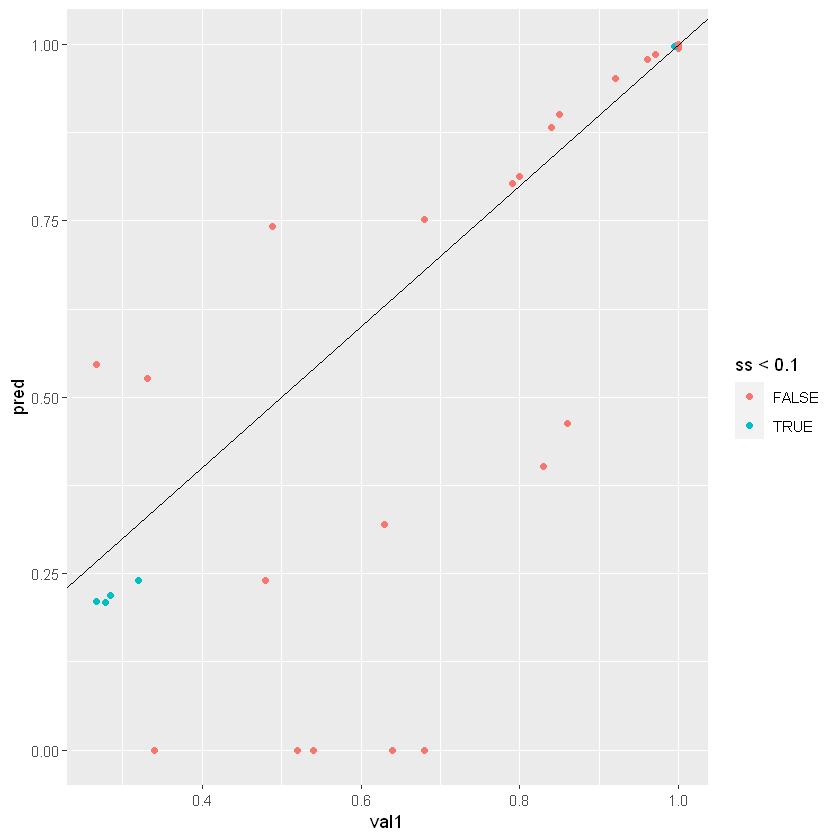

In [15]:
# THIRD itteration of fitting MaDshort 
# create blank file with FRED4 paramerets
data_meta_psd_short_fred4_it3 <- data.frame(id = data_meta_psd_short %>% 
                                            filter(!id %in% data_meta_psd_short_fred4_it2_goodlist) %>% 
                                            group_by(id) %>% 
                                            slice(1) %>% 
                                            select(id) %>% 
                                            as.data.frame(),
                                            a = rep(0, times = ncol(select(data_meta_psd_short_matrix,
                                                                  -data_meta_psd_short_fred4_it2_goodlist))-1),
                                            m = rep(0, times = ncol(select(data_meta_psd_short_matrix,
                                                                  -data_meta_psd_short_fred4_it2_goodlist))-1),
                                            n = rep(0, times = ncol(select(data_meta_psd_short_matrix,
                                                                  -data_meta_psd_short_fred4_it2_goodlist))-1),
                                            df = rep(0, times = ncol(select(data_meta_psd_short_matrix,
                                                                  -data_meta_psd_short_fred4_it2_goodlist))-1))

# function for calculation of Fredlund equation parameters
# NOTE! start fitting parameters - 0.1, n = 10, m = 10, df = 1000
for (i in 2:ncol(select(data_meta_psd_short_matrix, 
                        -data_meta_psd_short_fred4_it2_goodlist))) {
  tryCatch({
    dd = data.frame(D = c(0.002, 0.004, 0.020, 0.050, 0.063, 2.000),
                    fr = select(data_meta_psd_short_matrix, 
                                -data_meta_psd_short_fred4_it2_goodlist)[,i+1]) %>% 
      filter(is.na(fr) %in% FALSE)
    fit = fredlund4(D = "D", fr = "fr", p = 1, data = dd, a = 0.1, n = 10, m = 10, df = 1000)
    rownames(data_meta_psd_short_fred4_it3)[i] <- colnames(select(data_meta_psd_short_matrix,
                                                                  -data_meta_psd_short_fred4_it2_goodlist))[i+1]
    fit_coef <- coef(fit)
    data_meta_psd_short_fred4_it3[i,]$a <- fit_coef[[1]]
    data_meta_psd_short_fred4_it3[i,]$m <- fit_coef[[2]]
    data_meta_psd_short_fred4_it3[i,]$n <- fit_coef[[3]]
    data_meta_psd_short_fred4_it3[i,]$df <- fit_coef[[4]]
  }, error = function(e) {
    data_meta_psd_short_fred4_it3[i,]$a <- 0
    data_meta_psd_short_fred4_it3[i,]$m <- 0
    data_meta_psd_short_fred4_it3[i,]$n <- 0
    data_meta_psd_short_fred4_it3[i,]$df <- 0
  }
  )
}

# add dmin parameter
data_meta_psd_short_fred4_it3 <- data_meta_psd_short_fred4_it3  %>% 
full_join(data_meta_psd_short %>% 
          filter(!id %in% data_meta_psd_short_fred4_it2_goodlist) %>% 
          group_by(id) %>% 
          mutate(dmin = min(D) / 2) %>%
          slice(1) %>% 
          select(id, dmin))

#print table
data_meta_psd_short_fred4_it3

# test fitting quality of MaDshort - 3-rd ittertaion
data_meta_psd_short %>% 
  filter(!id %in% data_meta_psd_short_fred4_it2_goodlist) %>% 
  full_join(data_meta_psd_short_fred4_it3) %>%
  filter(is.na(a) %in% F & a > 0) %>% 
  group_by(id) %>% 
  mutate(pred = (1 / ((log(exp(1) + (a / D) ^ n) ^ m))) * (1 - ((log(1 + df / D)/(log(1 + df / dmin))) ^ 7)),
         ss = sigma(lm(val1 ~ 0 + pred))) %>% 
  ggplot()+
  geom_point(aes(x = val1, y = pred, col = ss < 0.1))+
  geom_abline(slope = 1)

In [16]:
# select samples with very good fitting ss < 0.1
data_meta_psd_short_fred4_it3_goodlist <- c(data.frame( id = data_meta_psd_short_fred4_it2_goodlist)  %>% 
                                            bind_rows(data_meta_psd_short %>% 
                                                      full_join(data_meta_psd_short_fred4_it3) %>%
                                                      filter(is.na(a) %in% F & a > 0) %>% 
                                                      group_by(id) %>% 
                                                      mutate(pred = (1 / ((log(exp(1) + (a / D) ^ n) ^ m))) * (1 - ((log(1 + df / D)/(log(1 + df / dmin))) ^ 7)),
                                                             ss = sigma(lm(val1 ~ 0 + pred)))  %>% 
                                                      filter(ss < 0.1) %>% 
                                                      slice(1) %>% 
                                                      select(id)))$id
data_meta_psd_short_fred4_it3_goodlist
data_meta_psd_short_fred4_it3_goodlist %>% length()

# binding good fitted samples after 3-rd itteration
data_meta_psd_short_fred4 <- data_meta_psd_short_fred4 %>% 
bind_rows(data_meta_psd_short_fred4_it3 %>%
          filter(id %in% data_meta_psd_short_fred4_it3_goodlist))
data_meta_psd_short_fred4

Joining, by = "id"


[1] X100 X101 X102 X103 X104 X105 X106 X107 X109 X110 X120 X121 X124 X128 X129
[16] X130 X131 X32  X33  X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44 
[31] X45  X46  X47  X48  X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  X59 
[46] X60  X61  X62  X63  X64  X65  X66  X67  X68  X69  X70  X71  X73  X74  X76 
[61] X77  X78  X79  X80  X81  X85  X88  X89  X90  X91  X92  X93  X94  X95  X96 
[76] X97  X98  X99  X119 X122 X123 X126 X127 X108 X118 X86  X87 
131 Levels: X1 X10 X100 X101 X102 X103 X104 X105 X106 X107 X108 X109 ... X99

[1] 87

id,a,m,n,df,dmin
X100,0.204933611,1.4397940,5.132811,0.010002630,0.001
X101,0.032918239,0.8240872,4.969553,0.010000739,0.001
X102,0.034530702,0.8249948,4.969704,0.010001213,0.001
X103,0.037631287,0.8274080,4.970041,0.009999746,0.001
X104,0.028967709,0.8224653,4.969282,0.010000051,0.001
X105,0.029930490,0.8227931,4.969335,0.010000143,0.001
X106,0.031757984,0.8235722,4.969439,0.010000490,0.001
X107,0.032327425,0.8238160,4.969494,0.010000607,0.001
X109,0.057818015,0.8267174,4.972216,0.285094692,0.001
X110,0.054611012,0.8991458,4.978873,0.010260388,0.001


Note: Using an external vector in selections is ambiguous.
i Use `all_of(data_meta_psd_short_fred4_it3_goodlist)` instead of `data_meta_psd_short_fred4_it3_goodlist` to silence this message.
i See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.
Joining, by = "id"


id,a,m,n,df,dmin
X1,0.000000e+00,0.0000000,0.0000000,0.000000,0.001
X10,5.540172e-13,0.9564847,0.9941544,99.999943,0.002
X11,5.690833e-02,1.1182942,4.8462600,3.969153,0.002
X117,5.842661e-13,0.9521216,0.9881707,99.999962,0.001
X12,5.613385e-02,1.1077654,4.8131458,3.912151,0.002
X125,2.719970e-13,0.9470996,0.9948552,99.999945,0.001
X13,5.276509e-02,1.0442808,4.6727349,3.972727,0.002
X14,5.177218e-02,1.0284011,4.6283383,3.972525,0.002
X72,1.406264e-14,0.9319735,0.9739073,99.999920,0.001
X75,5.272931e-15,0.9319706,0.9737074,99.999923,0.001


Joining, by = "id"


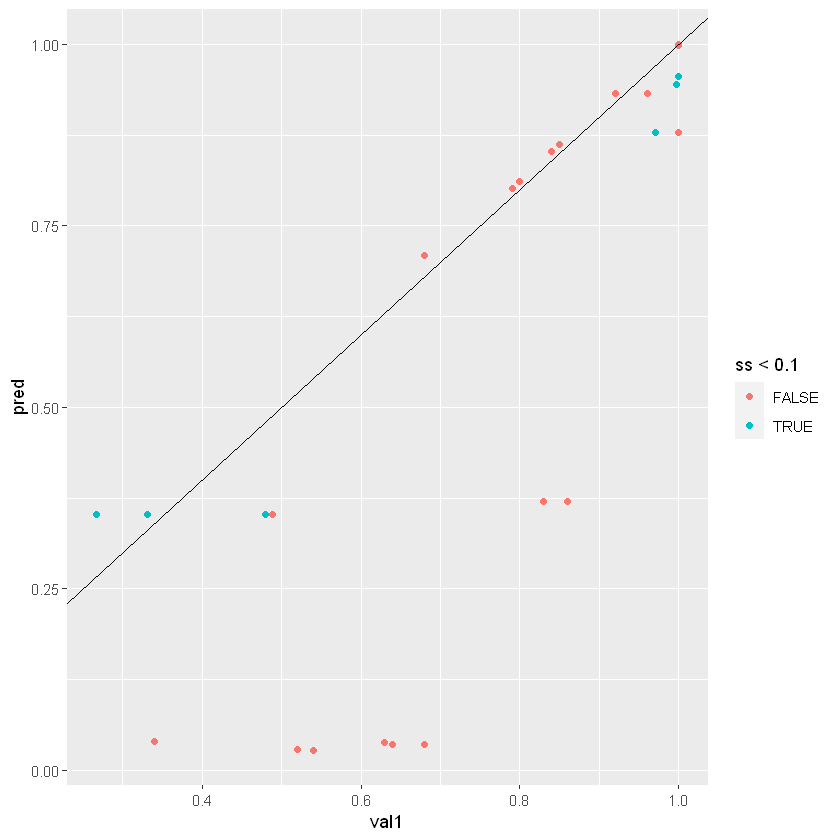

In [17]:
# FOURTH itteration of fitting MaDshort 
# create blank file with FRED4 paramerets
data_meta_psd_short_fred4_it4 <- data.frame(id = data_meta_psd_short %>% 
                                            filter(!id %in% 
                                                   data_meta_psd_short_fred4_it3_goodlist) %>% 
                                            group_by(id) %>% 
                                            slice(1) %>% 
                                            select(id) %>% 
                                            as.data.frame(),
                                            a = rep(0, times = ncol(select(data_meta_psd_short_matrix,
                                                                  -data_meta_psd_short_fred4_it3_goodlist))-1),
                                            m = rep(0, times = ncol(select(data_meta_psd_short_matrix,
                                                                  -data_meta_psd_short_fred4_it3_goodlist))-1),
                                            n = rep(0, times = ncol(select(data_meta_psd_short_matrix,
                                                                  -data_meta_psd_short_fred4_it3_goodlist))-1),
                                            df = rep(0, times = ncol(select(data_meta_psd_short_matrix,
                                                                  -data_meta_psd_short_fred4_it3_goodlist))-1))
# function for calculation of Fredlund equation parameters
# NOTE! start fitting parameters - a = 0.1, n = 1, m = 1, df = 100
for (i in 2:ncol(select(data_meta_psd_short_matrix, 
                        -data_meta_psd_short_fred4_it3_goodlist))) {
  tryCatch({
    dd = data.frame(D = c(0.002, 0.004, 0.020, 0.050, 0.063, 2.000),
                    fr = select(data_meta_psd_short_matrix, 
                                -data_meta_psd_short_fred4_it3_goodlist)[,i+1]) %>% 
      filter(is.na(fr) %in% FALSE)
    fit = fredlund4(D = "D", fr = "fr", p = 1, data = dd, a = 0.1, n = 1, m = 1, df = 100)
    rownames(data_meta_psd_short_fred4_it4)[i] <- colnames(select(data_meta_psd_short_matrix,
                                                                  -data_meta_psd_short_fred4_it3_goodlist))[i+1]
    fit_coef <- coef(fit)
    data_meta_psd_short_fred4_it4[i,]$a <- fit_coef[[1]]
    data_meta_psd_short_fred4_it4[i,]$m <- fit_coef[[2]]
    data_meta_psd_short_fred4_it4[i,]$n <- fit_coef[[3]]
    data_meta_psd_short_fred4_it4[i,]$df <- fit_coef[[4]]
  }, error = function(e) {
    data_meta_psd_short_fred4_it4[i,]$a <- 0
    data_meta_psd_short_fred4_it4[i,]$m <- 0
    data_meta_psd_short_fred4_it4[i,]$n <- 0
    data_meta_psd_short_fred4_it4[i,]$df <- 0
  }
  )
}

# add dmin parameter
data_meta_psd_short_fred4_it4 <- data_meta_psd_short_fred4_it4  %>% 
full_join(data_meta_psd_short %>% 
          filter(!id %in% data_meta_psd_short_fred4_it3_goodlist) %>% 
          group_by(id) %>% 
          mutate(dmin = min(D) / 2) %>%
          slice(1) %>% 
          select(id, dmin))

#print table
data_meta_psd_short_fred4_it4

# test fitting quality of MaDshort - 4-th ittertaion
data_meta_psd_short %>% 
  filter(!id %in% data_meta_psd_short_fred4_it3_goodlist) %>% 
  full_join(data_meta_psd_short_fred4_it4) %>%
  filter(is.na(a) %in% F & a > 0) %>% 
  group_by(id) %>% 
  mutate(pred = (1 / ((log(exp(1) + (a / D) ^ n) ^ m))) * (1 - ((log(1 + df / D)/(log(1 + df / dmin))) ^ 7)),
         ss = sigma(lm(val1 ~ 0 + pred))) %>% 
  ggplot()+
  geom_point(aes(x = val1, y = pred, col = ss < 0.1))+
  geom_abline(slope = 1)

In [18]:
# select samples with very good fitting ss < 0.1
data_meta_psd_short_fred4_it4_goodlist <- c(data.frame( id = data_meta_psd_short_fred4_it3_goodlist)  %>% 
                                            bind_rows(data_meta_psd_short %>% 
                                                      full_join(data_meta_psd_short_fred4_it4) %>%
                                                      filter(is.na(a) %in% F & a > 0) %>% 
                                                      group_by(id) %>% 
                                                      mutate(pred = (1 / ((log(exp(1) + (a / D) ^ n) ^ m))) * (1 - ((log(1 + df / D)/(log(1 + df / dmin))) ^ 7)),
                                                             ss = sigma(lm(val1 ~ 0 + pred)))  %>% 
                                                      filter(ss < 0.1) %>% 
                                                      slice(1) %>% 
                                                      select(id)))$id
data_meta_psd_short_fred4_it4_goodlist
data_meta_psd_short_fred4_it4_goodlist %>% length()

# binding good fitted samples after 4-th ittertaion
data_meta_psd_short_fred4 <- data_meta_psd_short_fred4 %>% 
bind_rows(data_meta_psd_short_fred4_it4 %>%
          filter(id %in% data_meta_psd_short_fred4_it4_goodlist))
data_meta_psd_short_fred4

Joining, by = "id"


[1] X100 X101 X102 X103 X104 X105 X106 X107 X109 X110 X120 X121 X124 X128 X129
[16] X130 X131 X32  X33  X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44 
[31] X45  X46  X47  X48  X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  X59 
[46] X60  X61  X62  X63  X64  X65  X66  X67  X68  X69  X70  X71  X73  X74  X76 
[61] X77  X78  X79  X80  X81  X85  X88  X89  X90  X91  X92  X93  X94  X95  X96 
[76] X97  X98  X99  X119 X122 X123 X126 X127 X108 X118 X86  X87  X117 X125 X72 
131 Levels: X1 X10 X100 X101 X102 X103 X104 X105 X106 X107 X108 X109 ... X99

[1] 90

id,a,m,n,df,dmin
X100,0.204933611,1.4397940,5.132811,0.010002630,0.001
X101,0.032918239,0.8240872,4.969553,0.010000739,0.001
X102,0.034530702,0.8249948,4.969704,0.010001213,0.001
X103,0.037631287,0.8274080,4.970041,0.009999746,0.001
X104,0.028967709,0.8224653,4.969282,0.010000051,0.001
X105,0.029930490,0.8227931,4.969335,0.010000143,0.001
X106,0.031757984,0.8235722,4.969439,0.010000490,0.001
X107,0.032327425,0.8238160,4.969494,0.010000607,0.001
X109,0.057818015,0.8267174,4.972216,0.285094692,0.001
X110,0.054611012,0.8991458,4.978873,0.010260388,0.001


Note: Using an external vector in selections is ambiguous.
i Use `all_of(data_meta_psd_short_fred4_it4_goodlist)` instead of `data_meta_psd_short_fred4_it4_goodlist` to silence this message.
i See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.
Joining, by = "id"


id,a,m,n,df,dmin
X1,0.0000000,0.000000000,0.000000,0.00000000,0.001
X10,0.3925341,0.037747951,4.950521,0.10474469,0.002
X11,0.3311839,0.111200250,5.010543,0.10043066,0.002
X12,0.3352026,0.104926688,5.008137,0.10059334,0.002
X13,0.3579927,0.080598203,4.995304,0.10143540,0.002
X14,0.3617858,0.074936936,4.991628,0.10171844,0.002
X75,0.8697267,-0.001662066,4.897390,0.12808905,0.001
X8,0.3547160,0.080792988,4.995772,0.10144368,0.002
X84,0.3001427,0.146194483,5.038501,0.09172992,0.001
X9,0.4262254,0.018138107,4.906362,0.10813543,0.002


Joining, by = "id"


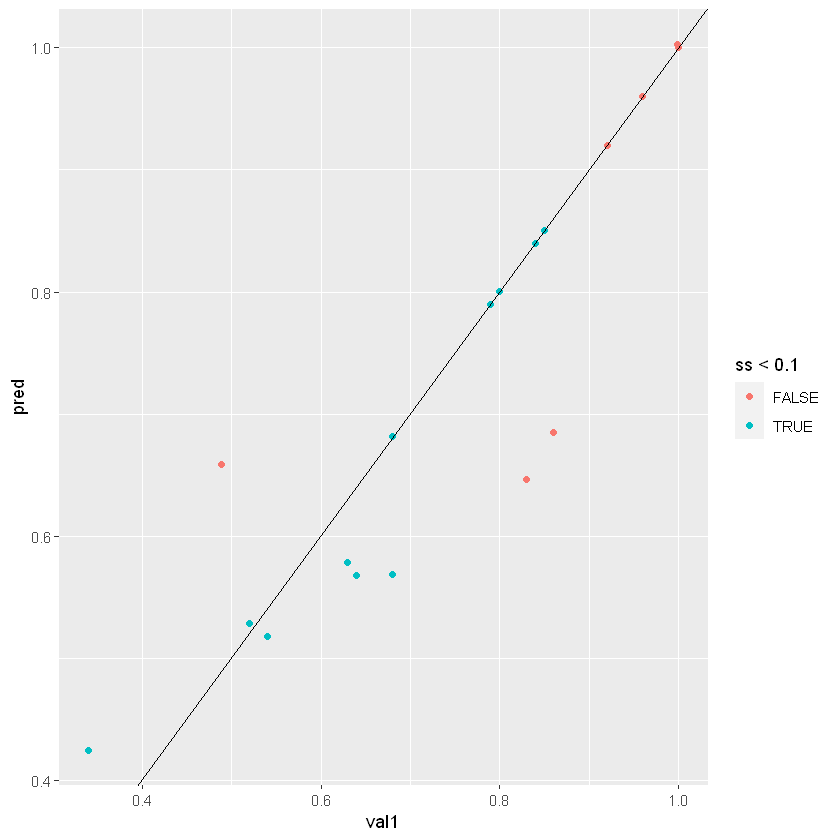

In [19]:
# FIFTH itteration of fitting MaDshort 
# create blank file with FRED4 paramerets
data_meta_psd_short_fred4_it5 <- data.frame(id = data_meta_psd_short %>% 
                                            filter(!id %in% 
                                                   data_meta_psd_short_fred4_it4_goodlist) %>% 
                                            group_by(id) %>% 
                                            slice(1) %>% 
                                            select(id) %>% 
                                            as.data.frame(),
                                            a = rep(0, times = ncol(select(data_meta_psd_short_matrix,
                                                                  -data_meta_psd_short_fred4_it4_goodlist))-1),
                                            m = rep(0, times = ncol(select(data_meta_psd_short_matrix,
                                                                  -data_meta_psd_short_fred4_it4_goodlist))-1),
                                            n = rep(0, times = ncol(select(data_meta_psd_short_matrix,
                                                                  -data_meta_psd_short_fred4_it4_goodlist))-1),
                                            df = rep(0, times = ncol(select(data_meta_psd_short_matrix,
                                                                  -data_meta_psd_short_fred4_it4_goodlist))-1))
# function for calculation of Fredlund equation parameters
# NOTE! start fitting parameters - a = 1, n = 5, m = 1, df = 0.1
for (i in 2:ncol(select(data_meta_psd_short_matrix, 
                        -data_meta_psd_short_fred4_it4_goodlist))) {
  tryCatch({
    dd = data.frame(D = c(0.002, 0.004, 0.020, 0.050, 0.063, 2.000),
                    fr = select(data_meta_psd_short_matrix, 
                                -data_meta_psd_short_fred4_it4_goodlist)[,i+1]) %>% 
      filter(is.na(fr) %in% FALSE)
    fit = fredlund4(D = "D", fr = "fr", p = 1, data = dd, a = 1, n = 5, m = 1, df = 0.1)
    rownames(data_meta_psd_short_fred4_it5)[i] <- colnames(select(data_meta_psd_short_matrix,
                                                                  -data_meta_psd_short_fred4_it4_goodlist))[i+1]
    fit_coef <- coef(fit)
    data_meta_psd_short_fred4_it5[i,]$a <- fit_coef[[1]]
    data_meta_psd_short_fred4_it5[i,]$m <- fit_coef[[2]]
    data_meta_psd_short_fred4_it5[i,]$n <- fit_coef[[3]]
    data_meta_psd_short_fred4_it5[i,]$df <- fit_coef[[4]]
  }, error = function(e) {
    data_meta_psd_short_fred4_it5[i,]$a <- 0
    data_meta_psd_short_fred4_it5[i,]$m <- 0
    data_meta_psd_short_fred4_it5[i,]$n <- 0
    data_meta_psd_short_fred4_it5[i,]$df <- 0
  }
  )
}

# add dmin parameter
data_meta_psd_short_fred4_it5 <- data_meta_psd_short_fred4_it5  %>% 
full_join(data_meta_psd_short %>% 
          filter(!id %in% data_meta_psd_short_fred4_it4_goodlist) %>% 
          group_by(id) %>% 
          mutate(dmin = min(D) / 2) %>%
          slice(1) %>% 
          select(id, dmin))

#print table
data_meta_psd_short_fred4_it5

# test fitting quality of MaDshort - 5-th ittertaion
data_meta_psd_short %>% 
  filter(!id %in% data_meta_psd_short_fred4_it4_goodlist) %>% 
  full_join(data_meta_psd_short_fred4_it5) %>%
  filter(is.na(a) %in% FALSE & a > 0) %>% 
  group_by(id) %>% 
  mutate(pred = (1 / ((log(exp(1) + (a / D) ^ n) ^ m))) * (1 - ((log(1 + df / D)/(log(1 + df / dmin))) ^ 7)),
         ss = sigma(lm(val1 ~ 0 + pred))) %>% 
  ggplot()+
  geom_point(aes(x = val1, y = pred, col = ss < 0.1))+
  geom_abline(slope = 1)

In [20]:
# select samples with very good fitting ss < 0.1
data_meta_psd_short_fred4_it5_goodlist <- c(data.frame( id = data_meta_psd_short_fred4_it4_goodlist)  %>% 
                                            bind_rows(data_meta_psd_short %>% 
                                                      full_join(data_meta_psd_short_fred4_it5) %>%
                                                      filter(is.na(a) %in% F & a > 0) %>% 
                                                      group_by(id) %>% 
                                                      mutate(pred = (1 / ((log(exp(1) + (a / D) ^ n) ^ m))) * (1 - ((log(1 + df / D)/(log(1 + df / dmin))) ^ 7)),
                                                             ss = sigma(lm(val1 ~ 0 + pred)))  %>% 
                                                      filter(ss < 0.1) %>% 
                                                      slice(1) %>% 
                                                      select(id)))$id
data_meta_psd_short_fred4_it5_goodlist
data_meta_psd_short_fred4_it5_goodlist %>% length()

# binding good fitted samples after 5-th itteration
data_meta_psd_short_fred4 <- data_meta_psd_short_fred4 %>% 
bind_rows(data_meta_psd_short_fred4_it5 %>%
          filter(id %in% data_meta_psd_short_fred4_it5_goodlist))
data_meta_psd_short_fred4

Joining, by = "id"


[1] X100 X101 X102 X103 X104 X105 X106 X107 X109 X110 X120 X121 X124 X128 X129
[16] X130 X131 X32  X33  X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44 
[31] X45  X46  X47  X48  X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  X59 
[46] X60  X61  X62  X63  X64  X65  X66  X67  X68  X69  X70  X71  X73  X74  X76 
[61] X77  X78  X79  X80  X81  X85  X88  X89  X90  X91  X92  X93  X94  X95  X96 
[76] X97  X98  X99  X119 X122 X123 X126 X127 X108 X118 X86  X87  X117 X125 X72 
[91] X11  X12  X13  X14  X8   X84 
131 Levels: X1 X10 X100 X101 X102 X103 X104 X105 X106 X107 X108 X109 ... X99

[1] 96

id,a,m,n,df,dmin
X100,0.204933611,1.4397940,5.132811,0.010002630,0.001
X101,0.032918239,0.8240872,4.969553,0.010000739,0.001
X102,0.034530702,0.8249948,4.969704,0.010001213,0.001
X103,0.037631287,0.8274080,4.970041,0.009999746,0.001
X104,0.028967709,0.8224653,4.969282,0.010000051,0.001
X105,0.029930490,0.8227931,4.969335,0.010000143,0.001
X106,0.031757984,0.8235722,4.969439,0.010000490,0.001
X107,0.032327425,0.8238160,4.969494,0.010000607,0.001
X109,0.057818015,0.8267174,4.972216,0.285094692,0.001
X110,0.054611012,0.8991458,4.978873,0.010260388,0.001


In [21]:
# CREATE FILE OF FINAL DATA

# binding and merging MD, MaDlong and MaDshort initial data and FRED4 paramaters
data_all <- data %>% 
full_join(data_psd_cumsum %>% 
          full_join(data_psd_fred4) %>% 
          rename(id = ID) ) %>% 
mutate(id = as.factor(id),
       field = as.factor(field),
       point = as.factor(point),
      sample_type = "MD") %>% 
bind_rows(data_meta %>% 
          select(id, soil, point, C, PL, LL) %>% 
          full_join(data_meta_psd %>% 
                    mutate (val = val / 100,val1 = val1 / 100, D = D / 1000,
                            sample_type = "MaDlong") %>% 
                    bind_rows(data_meta_psd_short %>% 
                             mutate(sample_type = "MaDshort")))  %>% 
          full_join(data_meta_psd_fred4 %>% 
                    bind_rows(data_meta_psd_short_fred4))) %>% 
filter(is.na(a) %in% FALSE & a > 0 & is.na(PL) %in% FALSE) %>% 
mutate(val1 = ifelse(val1 > 1, 1, val1))

data_all

Joining, by = c("ID", "soil", "lu", "field", "point", "depth")
Joining, by = c("soil", "lu", "field", "point", "depth")
Joining, by = "id"
Joining, by = "id"


soil,lu,field,point,depth,C,LL,PL,id,D,val,val1,a,m,n,df,dmin,sample_type
ch,ar,10,20,20,3.5016,41.02564,32.05,1,1.28e-05,0.0000,0.0000,0.00590866,2.789452,1.012072,53.04093,1.28e-05,MD
ch,ar,10,20,20,3.5016,41.02564,32.05,1,1.52e-05,0.0000,0.0000,0.00590866,2.789452,1.012072,53.04093,1.28e-05,MD
ch,ar,10,20,20,3.5016,41.02564,32.05,1,1.81e-05,0.0000,0.0000,0.00590866,2.789452,1.012072,53.04093,1.28e-05,MD
ch,ar,10,20,20,3.5016,41.02564,32.05,1,2.15e-05,0.0000,0.0000,0.00590866,2.789452,1.012072,53.04093,1.28e-05,MD
ch,ar,10,20,20,3.5016,41.02564,32.05,1,2.55e-05,0.0000,0.0000,0.00590866,2.789452,1.012072,53.04093,1.28e-05,MD
ch,ar,10,20,20,3.5016,41.02564,32.05,1,3.00e-05,0.0000,0.0000,0.00590866,2.789452,1.012072,53.04093,1.28e-05,MD
ch,ar,10,20,20,3.5016,41.02564,32.05,1,3.60e-05,0.0000,0.0000,0.00590866,2.789452,1.012072,53.04093,1.28e-05,MD
ch,ar,10,20,20,3.5016,41.02564,32.05,1,4.30e-05,0.0000,0.0000,0.00590866,2.789452,1.012072,53.04093,1.28e-05,MD
ch,ar,10,20,20,3.5016,41.02564,32.05,1,5.10e-05,0.0000,0.0000,0.00590866,2.789452,1.012072,53.04093,1.28e-05,MD
ch,ar,10,20,20,3.5016,41.02564,32.05,1,6.10e-05,0.0000,0.0000,0.00590866,2.789452,1.012072,53.04093,1.28e-05,MD


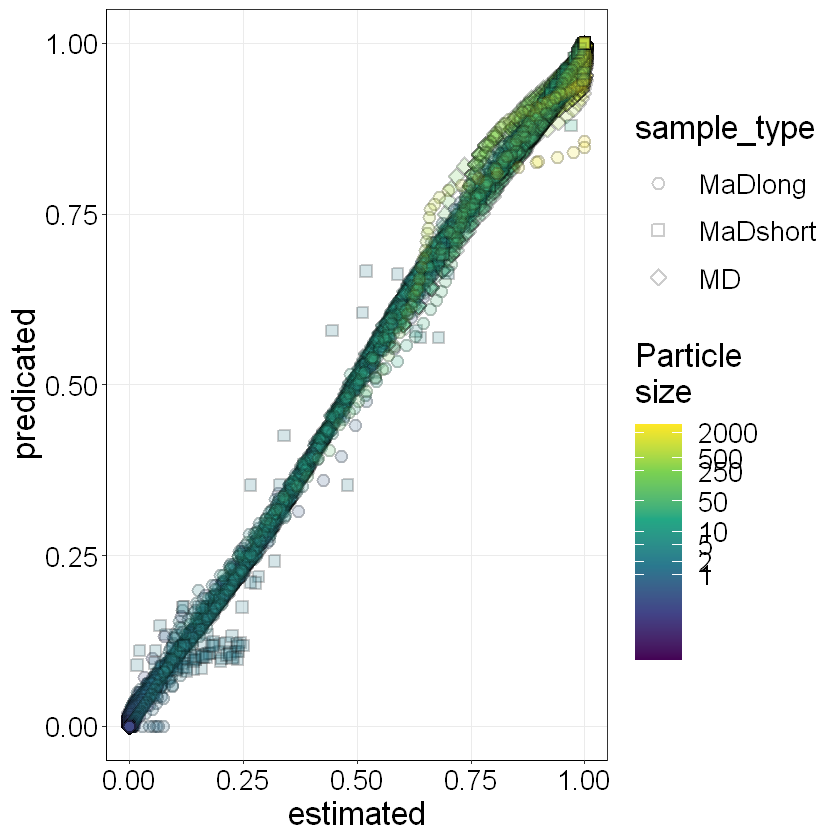

In [27]:
data_all %>% 
group_by(id) %>% 
mutate(pred = (1 / ((log(exp(1) + (a / D) ^ n) ^ m))) * 
       (1 - ((log(1 + df / D)/(log(1 + df / dmin))) ^ 7))) %>% 
ggplot()+
geom_point(aes(x = val1, y = pred, fill = D * 1000, shape = sample_type), 
           alpha = 0.2, size = 3, stroke = 1,
           show.legend = TRUE)+
scale_shape_manual(values = c(21, 22, 23)) + 
scale_fill_viridis_c(trans = "log10", 
                     breaks = c(1, 2, 5, 10, 50, 250, 500, 2000))+
labs(title = "",
       subtitle = "",
       x = "estimated",
       y = "predicated",
       fill = "Particle
size")+
  theme_bw()+
  theme(text = element_text(size = 20),
        legend.position = "right",
        legend.background = element_blank(),
        panel.grid.minor = element_blank(),
        plot.title = element_blank(),
        plot.subtitle = element_blank(),
        legend.key.size =  unit(1, "cm"),
        axis.line = element_line(colour = "black"),
        axis.text = element_text(colour = "black"),
        axis.title = element_text(colour = "black"))

ggsave("plot_fred_est-pred.png", width = 8, height = 9, dpi = 300)

In [23]:
# CREATE GENERAL FILE WITH INITIAL PARTICLE SIZE FRACTIONS
data_all_joined <- data_all  %>% 
full_join(data_psd %>% 
          mutate(field = as.factor(field),
                 point = as.factor(point)) %>% 
          select(1:5, 90:99)) %>% 
full_join(data_meta %>% 
          select(1:16)) %>%
mutate(D2 = CL_2,
       D4 = CL_4,
       D5 = CL_5,
       D20 = Si_2_20 + CL_2,
       D50 = Si_2_50 + CL_2,
       D63 = ifelse(is.na(Si_4_63) %in% F, Si_4_63 + CL_4, Si_2_63 + CL_2),
       D74 = ifelse(is.na(Si_5_75) %in% F, Si_5_75 + CL_5, Si_2_75 + CL_2)) %>% 
  mutate(D1 = ifelse(is.na(D1) %in% TRUE, 100*(1/((log(exp(1)+(a/0.001)^n)^m)))*(1-((log(1+df/0.001)/(log(1+df/dmin)))^7)), D1),
         D2 = ifelse(is.na(D2) %in% TRUE, 100*(1/((log(exp(1)+(a/0.002)^n)^m)))*(1-((log(1+df/0.002)/(log(1+df/dmin)))^7)), D2),
         D4 = ifelse(is.na(D4) %in% TRUE, 100*(1/((log(exp(1)+(a/0.004)^n)^m)))*(1-((log(1+df/0.004)/(log(1+df/dmin)))^7)), D4),
         D5 = ifelse(is.na(D5) %in% TRUE, 100*(1/((log(exp(1)+(a/0.005)^n)^m)))*(1-((log(1+df/0.005)/(log(1+df/dmin)))^7)), D5), 
         D8 = 100*(1/((log(exp(1)+(a/0.008)^n)^m)))*(1-((log(1+df/0.008)/(log(1+df/dmin)))^7)),
         D10 = ifelse(is.na(D10) %in% TRUE, 100*(1/((log(exp(1)+(a/0.010)^n)^m)))*(1-((log(1+df/0.010)/(log(1+df/dmin)))^7)), D10),
         D16 = 100*(1/((log(exp(1)+(a/0.016)^n)^m)))*(1-((log(1+df/0.016)/(log(1+df/dmin)))^7)), 
         D20 = ifelse(is.na(D20) %in% TRUE, 100*(1/((log(exp(1)+(a/0.020)^n)^m)))*(1-((log(1+df/0.020)/(log(1+df/dmin)))^7)), D20), 
         D31 = 100*(1/((log(exp(1)+(a/0.031)^n)^m)))*(1-((log(1+df/0.031)/(log(1+df/dmin)))^7)), 
         D50 = ifelse(is.na(D50) %in% TRUE, 100*(1/((log(exp(1)+(a/0.050)^n)^m)))*(1-((log(1+df/0.050)/(log(1+df/dmin)))^7)), D50),
         D63 = ifelse(is.na(D63) %in% TRUE, 100*(1/((log(exp(1)+(a/0.050)^n)^m)))*(1-((log(1+df/0.063)/(log(1+df/dmin)))^7)), D63),
         D74 = ifelse(is.na(D74) %in% TRUE, 100*(1/((log(exp(1)+(a/0.074)^n)^m)))*(1-((log(1+df/0.074)/(log(1+df/dmin)))^7)), D74),
         D100 = 100*(1/((log(exp(1)+(a/0.1)^n)^m)))*(1-((log(1+df/0.1)/(log(1+df/dmin)))^7)), 
         D125 = 100*(1/((log(exp(1)+(a/0.125)^n)^m)))*(1-((log(1+df/0.125)/(log(1+df/dmin)))^7)), 
         D200 = 100*(1/((log(exp(1)+(a/0.20)^n)^m)))*(1-((log(1+df/0.20)/(log(1+df/dmin)))^7)), 
         D250 = ifelse(is.na(D250) %in% TRUE, 100*(1/((log(exp(1)+(a/0.250)^n)^m)))*(1-((log(1+df/0.250)/(log(1+df/dmin)))^7)), D250),
         D425 = 100*(1/((log(exp(1)+(a/0.425)^n)^m)))*(1-((log(1+df/0.425)/(log(1+df/dmin)))^7)),
         D500 = ifelse(is.na(D500) %in% TRUE, 100*(1/((log(exp(1)+(a/0.500)^n)^m)))*(1-((log(1+df/0.500)/(log(1+df/dmin)))^7)), D500),
         D1000 = ifelse(is.na(D1000) %in% TRUE, 100*(1/((log(exp(1)+(a/1)^n)^m)))*(1-((log(1+df/1)/(log(1+df/dmin)))^7)),D1000), 
         D2000 = 100) %>% 
  mutate(D50 =  ifelse(D50 > 100, 100, D50),
         D63 =  ifelse(D63 > 100, 100, D63),
         D74 =  ifelse(D74 > 100, 100, D74),
         D100 =  ifelse(D100 > 100, 100, D100),
         D125 =  ifelse(D125 > 100, 100, D125),
         D200 =  ifelse(D200 > 100, 100, D200),
         D250 =  ifelse(D250 > 100, 100, D250),
         D425 =  ifelse(D425 > 100, 100, D425),
         D500 =  ifelse(D500 > 100, 100, D500),
         D1000 =  ifelse(D1000 > 100, 100, D1000)) %>% 
  mutate(CL_1_0 = D1,
         CL_2_0 = D2,
         CL_5_0 = D5,
         Si_5_1 = D5 - D1,
         Si_5_2 = D5 - D2, 
         Si_10_5 = D10 - D5,
         Si_50_10 = D50 - D10,
         Si_4_2 = D4 - D2, 
         Si_8_4 = D8 - D4,
         Si_16_8 = D16 - D8,
         Si_31_16 = D31 - D16,
         Si_63_31 = D63 - D31,
         Si_50_1 = D10 - D1,
         Si_50_2 = D50 - D2,
         Si_20_2 = D20 - D2,
         Si_63_2 = D63 - D2,
         Si_50_20 = D50 - D20,
         Si_74_5 = D74 - D5,
         CL_74_0 = D74,
         Sa_100_50 = D100 - D50,
         Sa_250_100 = D100 - D50,
         Sa_250_50 = D250 - D50,
         Sa_500_250 = D500 - D250,
         Sa_1000_500 = D1000 - D500,
         Sa_2000_1000 = D2000 - D1000,
         Sa_2000_50 = D2000 - D50,
         Sa_200_20 = D200 - D20,
         Sa_2000_200 = D2000 - D200,
         Sa_2000_20 = D2000 - D20,
         Sa_425_74 = D425 - D74,
         Sa_2000_425 = D2000 - D425,
         Sa_2000_74 = D2000 - D74,
         Sa_1000_50 = D1000 - D50,
         Sa_125_63 = D125 - D63,
         Sa_250_125 = D250 - D125,
         Sa_2000_63 = D2000 - D63,
         PI = LL - PL) %>% 
filter(is.na(PL) %in% FALSE)

data_all_joined

Joining, by = c("soil", "lu", "field", "point", "depth")
Joining, by = c("soil", "point", "id")


soil,lu,field,point,depth,C,LL,PL,id,D,...,Sa_2000_200,Sa_2000_20,Sa_425_74,Sa_2000_425,Sa_2000_74,Sa_1000_50,Sa_125_63,Sa_250_125,Sa_2000_63,PI
ch,ar,10,20,20,3.5016,41.02564,32.05,1,1.28e-05,...,2.920921,24.44022,6.324151,1.371254,7.695405,11.08475,6.372983,2.91333,11.01631,8.975641
ch,ar,10,20,20,3.5016,41.02564,32.05,1,1.52e-05,...,2.920921,24.44022,6.324151,1.371254,7.695405,11.08475,6.372983,2.91333,11.01631,8.975641
ch,ar,10,20,20,3.5016,41.02564,32.05,1,1.81e-05,...,2.920921,24.44022,6.324151,1.371254,7.695405,11.08475,6.372983,2.91333,11.01631,8.975641
ch,ar,10,20,20,3.5016,41.02564,32.05,1,2.15e-05,...,2.920921,24.44022,6.324151,1.371254,7.695405,11.08475,6.372983,2.91333,11.01631,8.975641
ch,ar,10,20,20,3.5016,41.02564,32.05,1,2.55e-05,...,2.920921,24.44022,6.324151,1.371254,7.695405,11.08475,6.372983,2.91333,11.01631,8.975641
ch,ar,10,20,20,3.5016,41.02564,32.05,1,3.00e-05,...,2.920921,24.44022,6.324151,1.371254,7.695405,11.08475,6.372983,2.91333,11.01631,8.975641
ch,ar,10,20,20,3.5016,41.02564,32.05,1,3.60e-05,...,2.920921,24.44022,6.324151,1.371254,7.695405,11.08475,6.372983,2.91333,11.01631,8.975641
ch,ar,10,20,20,3.5016,41.02564,32.05,1,4.30e-05,...,2.920921,24.44022,6.324151,1.371254,7.695405,11.08475,6.372983,2.91333,11.01631,8.975641
ch,ar,10,20,20,3.5016,41.02564,32.05,1,5.10e-05,...,2.920921,24.44022,6.324151,1.371254,7.695405,11.08475,6.372983,2.91333,11.01631,8.975641
ch,ar,10,20,20,3.5016,41.02564,32.05,1,6.10e-05,...,2.920921,24.44022,6.324151,1.371254,7.695405,11.08475,6.372983,2.91333,11.01631,8.975641


The following `from` values were not present in `x`: Si, Sa
The following `from` values were not present in `x`: Si, Sa
The following `from` values were not present in `x`: Si, Sa
The following `from` values were not present in `x`: Si, Sa
The following `from` values were not present in `x`: Si, Sa
The following `from` values were not present in `x`: Si, Sa
The following `from` values were not present in `x`: CL, Si
The following `from` values were not present in `x`: CL, Si
The following `from` values were not present in `x`: CL, Si
The following `from` values were not present in `x`: CL, Si
The following `from` values were not present in `x`: CL, Si
The following `from` values were not present in `x`: CL, Si
The following `from` values were not present in `x`: CL, Si
The following `from` values were not present in `x`: CL, Si
The following `from` values were not present in `x`: CL, Si
The following `from` values were not present in `x`: CL, Sa
The following `from` values were not pre

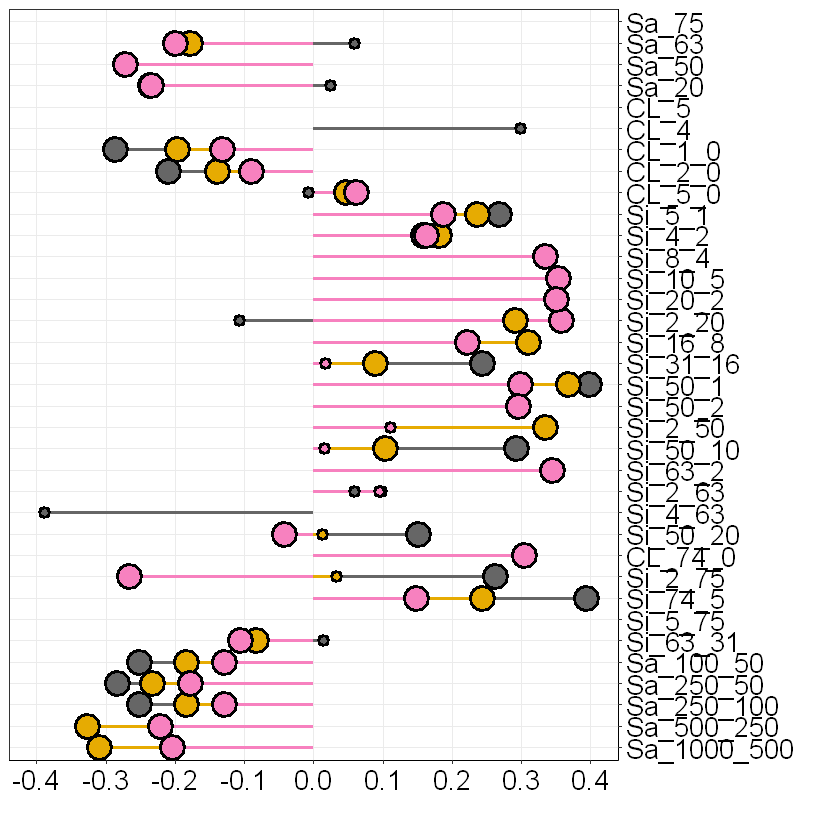

In [24]:
# correlation plot of particle size fractions
data_all_joined %>% 
select(-c(D, val, val1, sample_type, a, n, m , df, dmin, C, D1, D2, D4, D5, D8, D10, 
          D16, D20, D31, D50, D63, D74, D100, D125, D200, D250, D425, D500, D1000, D2000)) %>% 
group_by(id, soil, lu, field, point, depth) %>% 
gather(var, val, 10:45) %>% 
group_by(var) %>% 
mutate(sym_PL = cor.test(PL, val)$estimate,
       p_PL = cor.test(PL, val)$p.value,
       sym_LL = cor.test(LL, val)$estimate,
       p_LL = cor.test(LL, val)$p.value,
       sym_PI = cor.test(PI, val)$estimate,
       p_PI = cor.test(PI, val)$p.value,
       var1 = var) %>% 
separate(var1, c("A", "B", "C")) %>% 
mutate(AA = as.numeric(as.character(revalue(A, c("CL" = 1, "Si" = 2, "Sa" = 3)))),
       C = as.numeric(as.character(C)),
       B = as.numeric(as.character(B)),
      AA = (B + C) / 2) %>% 
slice(1) %>% 
filter(var != c("Si_5_2")) %>% 
ggplot()+
geom_segment( aes(x = 0, xend = sym_PL, y = reorder(var, -AA), 
                  yend = reorder(var, -AA)), colour = "#666666", size  = 1) +
geom_segment( aes(x = 0, xend = sym_LL, y = reorder(var, -AA), 
                  yend = reorder(var, -AA)), colour = "#e6ab02", size  = 1) +
geom_segment( aes(x = 0, xend = sym_PI, y = reorder(var, -AA), 
                  yend = reorder(var, -AA)), colour = "#f781bf", size  = 1) +
geom_point(aes(x = sym_PL, y = reorder(var, -AA), size = p_PL < 0.01), shape = 21, 
             fill = "#666666", show.legend = F,  stroke = 1.5) +
geom_point(aes(x = sym_LL, y = reorder(var, -AA), size = p_LL < 0.01), shape = 21, 
           fill = "#e6ab02", show.legend = F,  stroke = 1.5) +
geom_point(aes(x = sym_PI, y = reorder(var, -AA), size = p_PI < 0.01), shape = 21, 
           fill = "#f781bf", show.legend = F, stroke =1.5) +
scale_x_continuous(limits = c(-0.4, 0.4), breaks = seq(-10, 10, by = 0.1))+
scale_y_discrete(position = "right")+
  labs(title = "",
       subtitle = "",
       x = "",
       y = "",
       fill = "")+
  theme_bw()+
  theme(text = element_text(size = 20),
        legend.position = c(0.9, 0.25),
        legend.background = element_blank(),
        panel.grid.minor = element_blank(),
        plot.title = element_blank(),
        plot.subtitle = element_blank(),
        legend.key.size =  unit(1, "cm"),
        axis.line = element_line(colour = "black"),
        axis.text = element_text(colour = "black"),
        axis.title = element_text(colour = "black"))

ggsave("plot_corFunell_PartSizeFr.png", width = 10, height = 10, dpi = 300)

The following `from` values were not present in `x`: m, n, df
The following `from` values were not present in `x`: a, m, n
The following `from` values were not present in `x`: a, n, df
The following `from` values were not present in `x`: a, m, df


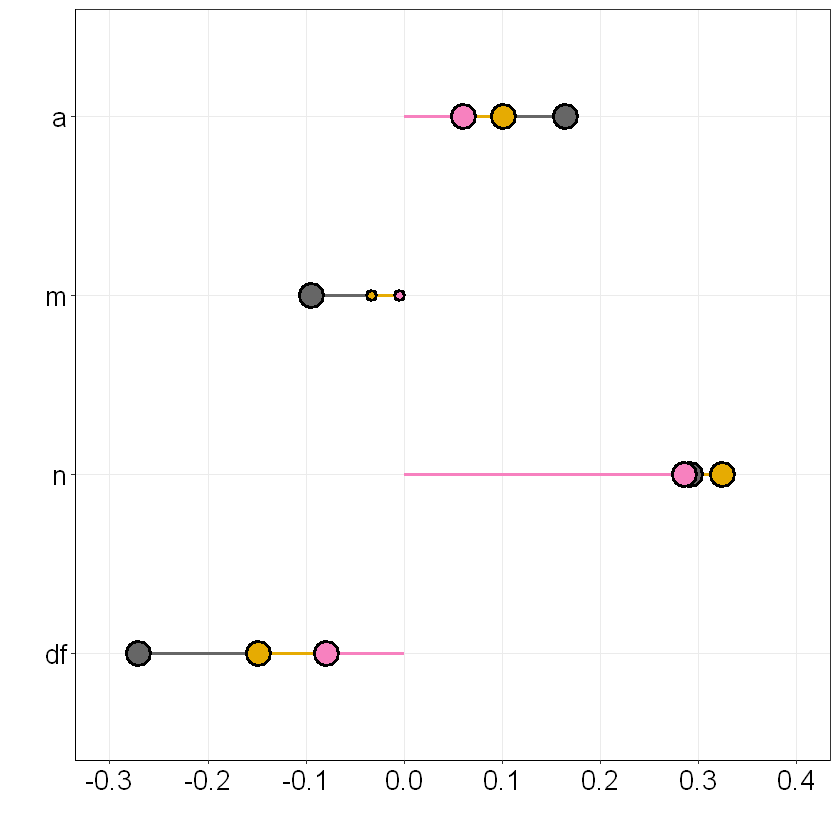

In [25]:
# correlation plot of FRED4 parameters
data_all_joined %>% 
select(c(id, soil, lu, field, point, depth, LL, PL, PI, a, n, m, df)) %>% 
group_by(id, soil, lu, field, point, depth) %>% 
gather(var, val, 10:13) %>% 
group_by(var) %>% 
mutate(sym_PL = cor.test(PL, val)$estimate,
       p_PL = cor.test(PL, val)$p.value,
       sym_LL = cor.test(LL, val)$estimate,
       p_LL = cor.test(LL, val)$p.value,
       sym_PI = cor.test(PI, val)$estimate,
       p_PI = cor.test(PI, val)$p.value) %>% 
mutate(AA = as.numeric(as.character(revalue(var, c("a" = 1, "m" = 2, "n" = 3, "df" = 4))))) %>% 
slice(1) %>% 
ggplot()+
geom_segment( aes(x = 0, xend = sym_PL, y = reorder(var, -AA), 
                  yend = reorder(var, -AA)), colour = "#666666", size  = 1) +
geom_segment( aes(x = 0, xend = sym_LL, y = reorder(var, -AA), 
                  yend = reorder(var, -AA)), colour = "#e6ab02", size  = 1) +
geom_segment( aes(x = 0, xend = sym_PI, y = reorder(var, -AA), 
                  yend = reorder(var, -AA)), colour = "#f781bf", size  = 1) +
geom_point(aes(x = sym_PL, y = reorder(var, -AA), size = p_PL < 0.01), shape = 21, 
             fill = "#666666", show.legend = F,  stroke = 1.5) +
geom_point(aes(x = sym_LL, y = reorder(var, -AA), size = p_LL < 0.01), shape = 21, 
           fill = "#e6ab02", show.legend = F,  stroke = 1.5) +
geom_point(aes(x = sym_PI, y = reorder(var, -AA), size = p_PI < 0.01), shape = 21, 
           fill = "#f781bf", show.legend = F, stroke =1.5) +
scale_x_continuous(limits = c(-0.3, 0.4), breaks = seq(-10, 10, by = 0.1)) +
  labs(title = "",
       subtitle = "",
       x = "",
       y = "",
       fill = "")+
  theme_bw()+
  theme(text = element_text(size = 20),
        legend.position = c(0.9, 0.25),
        legend.background = element_blank(),
        panel.grid.minor = element_blank(),
        plot.title = element_blank(),
        plot.subtitle = element_blank(),
        legend.key.size =  unit(1, "cm"),
        axis.line = element_line(colour = "black"),
        axis.text = element_text(colour = "black"),
        axis.title = element_text(colour = "black"))

ggsave("plot_corFunell_fred.png", width = 5, height = 5, dpi = 300)

In [26]:
# PART OF CLAY AND SAND SEARCHING

# create file for computation 
data_all_comps <- data_all %>% mutate(PI = LL - PL) %>% group_by(id) %>% slice(1)

# turn on libraryies for parallel computations
library(foreach)
library(doParallel)
library(itertools)
library(bigstatsr)
library(bigmemory)
# play parallel computations
cl <- parallel::makeCluster(20)
registerDoParallel(cl)

# create blank correlation matrix 
cor_2000_PL <- FBM(init = NA, nrow = length(seq(1, 2000, by = 1)), 
                   ncol = length(seq(0, 2000, by = 1)) + 2)
cor_2000_LL <- FBM(init = NA, nrow = length(seq(1, 2000, by = 1)), 
                   ncol = length(seq(0, 2000, by = 1)) + 2)
cor_2000_PI <- FBM(init = NA, nrow = length(seq(1, 2000, by = 1)), 
                   ncol = length(seq(0, 2000, by = 1)) + 2)


# functions 
a <- foreach(n = seq(1, 2000, by = 1), .packages = c("foreach", "base", "stats")) %dopar% {
  foreach(i = seq(0, 2000, by = 1), .combine = 'rbind') %do% {
    j <- i + n
    if (j > 2000) next;
    parts_i <- (1 / ((log(exp(1) + (data_all_comps$a / (i / 1000))^data_all_comps$n)^data_all_comps$m))) * (1 - ((log(1 + data_all_comps$df / (i / 1000)) / (log(1 + data_all_comps$df / data_all_comps$dmin)))^7))
    parts_i <- ifelse(is.na(parts_i) %in% TRUE, rep(0, times = nrow(data_all_comps)), parts_i)
    parts_i <- ifelse(parts_i < 0 , 0, parts_i)
    parts_i <- ifelse(parts_i > 1, 1, parts_i)
    parts_j <- (1 / ((log(exp(1) + (data_all_comps$a / (j / 1000))^data_all_comps$n)^data_all_comps$m))) * (1 - ((log(1 + data_all_comps$df / (j / 1000)) / (log(1 + data_all_comps$df / data_all_comps$dmin)))^7))
    parts_j <- ifelse(parts_j < 0 , 0, parts_j)
    parts_j <- ifelse(parts_j > 1, 1, parts_j)
    parts_i_j <- parts_j - parts_i
    cor_2000_PL[n, i + 2] <- cor(data_all_comps$PL, parts_i_j, method = "pearson", use = "complete.obs")
    cor_2000_LL[n, i + 2] <- cor(data_all_comps$LL, parts_i_j, method = "pearson", use = "complete.obs")
    cor_2000_PI[n, i + 2] <- cor(data_all_comps$PI, parts_i_j, method = "pearson", use = "complete.obs")
    NULL
  }
}


ERROR: Error in {: task 1 failed - "task 2001 failed - "нет цикла для прерывания/следующего, перехожу на верхний уровень""


In [28]:
parallel::stopCluster(cl)

In [ ]:
# rename of columns
cor_2000_PL_df <- cor_2000_PL[] %>% as.data.frame() %>% select(1:2002 ) %>% 
                `colnames<-`(c("n", seq(0, 2000, by = 1))) %>% mutate(n = seq(1, 2000))
cor_2000_LL_df <- cor_2000_LL[] %>% as.data.frame() %>% select(1:2002) %>% 
                `colnames<-`(c("n", seq(0, 2000, by = 1))) %>% mutate(n = seq(1, 2000))
cor_2000_PI_df <- cor_2000_PI[] %>% as.data.frame() %>% select(1:2002) %>% 
                `colnames<-`(c("n", seq(0, 2000, by = 1))) %>% mutate(n = seq(1, 2000))

cor_2000_PL_df
cor_2000_LL_df
cor_2000_PI_df

#  data transformation from matrix to one column
cor_2000_PL_df_trans <- cor_2000_PL_df %>% 
  gather(i, val, 2:ncol(cor_2000_PL_df)) %>% 
  mutate(i = as.numeric(as.character(i))) %>% 
  filter(is.na(val) %in% FALSE)

cor_2000_LL_df_trans <- cor_2000_LL_df %>% 
  gather(i, val, 2:ncol(cor_2000_LL_df)) %>% 
  mutate(i = as.numeric(as.character(i))) %>% 
  filter(is.na(val) %in% FALSE)

cor_2000_PI_df_trans <- cor_2000_PI_df %>% 
  gather(i, val, 2:ncol(cor_2000_PI_df)) %>% 
  mutate(i = as.numeric(as.character(i))) %>% 
  filter(is.na(val) %in% FALSE)

In [ ]:
# plot of PL correlation matrix
# plot of Plastic limits
cor_2000_PL_df_trans %>% 
mutate(i = i + 1,
       ii = log10(i),
       nn = log10(n),
      nnn = 0.5 / n,
      iii = 0.5 / i) %>% 
ggplot(aes(x = nn, y = ii, fill = val, width = nnn, height = iii)) +
geom_tile() +  
scale_fill_distiller(breaks = seq(-1, 1, by = 0.05), 
                     limits = c(-0.33, 0.33), 
                     type = "div",
                     palette = 5,
                     direction = -1) +
scale_x_continuous(breaks = c(log10(1), log10(10), log10(100), log10(1000), log10(2000)),
                  labels = c("1", "10", "100", "1000", "2000")) +
scale_y_continuous(breaks = c(log10(1),log10(2), log10(11), log10(101), log10(1001), log10(2000)),
                  labels = c("0", "1", "10", "100", "1000", "2000")) +
theme_bw() +
theme(text = element_text(size = 20),
      legend.position = "right",
      legend.background = element_blank(),
      panel.grid.minor = element_blank(),
      plot.title = element_blank(),
      plot.subtitle = element_blank(),
      legend.key.height =  unit(2, "cm"),
      axis.line = element_line(colour = "black"),
      axis.text = element_text(colour = "black"),
      axis.title = element_text(colour = "black"))

ggsave("plot_PL_sizeFr_2000.png", width = 11, height = 10, dpi = 300)

# plot of Liquid limits
cor_2000_LL_df_trans %>% 
mutate(i = i + 1,
       ii = log10(i),
       nn = log10(n),
      nnn = 0.5 / n,
      iii = 0.5 / i) %>% 
ggplot(aes(x = nn, y = ii, fill = val, width = nnn, height = iii)) +
geom_tile() +  
scale_fill_distiller(breaks = seq(-1, 1, by = 0.05), 
                     limits = c(-0.33, 0.33), 
                     type = "div",
                     palette = 5,
                     direction = -1) +
scale_x_continuous(breaks = c(log10(1), log10(10), log10(100), log10(1000), log10(2000)),
                  labels = c("1", "10", "100", "1000", "2000")) +
scale_y_continuous(breaks = c(log10(1),log10(2), log10(11), log10(101), log10(1001), log10(2000)),
                  labels = c("0", "1", "10", "100", "1000", "2000")) +
theme_bw() +
theme(text = element_text(size = 20),
      legend.position = "right",
      legend.background = element_blank(),
      panel.grid.minor = element_blank(),
      plot.title = element_blank(),
      plot.subtitle = element_blank(),
      legend.key.height =  unit(2, "cm"),
      axis.line = element_line(colour = "black"),
      axis.text = element_text(colour = "black"),
      axis.title = element_text(colour = "black"))

ggsave("plot_LL_sizeFr_2000.png", width = 11, height = 10, dpi = 300)

# plot of Plasiticity index
cor_2000_PI_df_trans %>% 
mutate(i = i + 1,
       ii = log10(i),
       nn = log10(n),
      nnn = 0.5 / n,
      iii = 0.5 / i) %>% 
ggplot(aes(x = nn, y = ii, fill = val, width = nnn, height = iii)) +
geom_tile() +  
scale_fill_distiller(breaks = seq(-1, 1, by = 0.05), 
                     limits = c(-0.33, 0.33), 
                     type = "div",
                     palette = 5,
                     direction = -1) +
scale_x_continuous(breaks = c(log10(1), log10(10), log10(100), log10(1000), log10(2000)),
                  labels = c("1", "10", "100", "1000", "2000")) +
scale_y_continuous(breaks = c(log10(1),log10(2), log10(11), log10(101), log10(1001), log10(2000)),
                  labels = c("0", "1", "10", "100", "1000", "2000")) +
theme_bw() +
theme(text = element_text(size = 20),
      legend.position = "right",
      legend.background = element_blank(),
      panel.grid.minor = element_blank(),
      plot.title = element_blank(),
      plot.subtitle = element_blank(),
      legend.key.height =  unit(2, "cm"),
      axis.line = element_line(colour = "black"),
      axis.text = element_text(colour = "black"),
      axis.title = element_text(colour = "black"))

ggsave("plot_PI_sizeFr_2000.png", width = 11, height = 10, dpi = 300)

In [ ]:
library(ggpubr)

# histogram
ggplot()+
geom_density(data = cor_2000_PL_df_trans, aes(x = val), 
                 fill = "#fdc086", col = "#fdc086", alpha = 0.3, size = 1)+
  geom_density(data = cor_2000_LL_df_trans, aes(x = val), 
                 fill = "#beaed4", col = "#beaed4", alpha = 0.3, size  = 1)+
  geom_density(data = cor_2000_PI_df_trans, aes(x = val), 
                 fill = "#7fc97f", col = "#7fc97f", alpha = 0.3, size = 1) + 
  scale_x_continuous(breaks = seq(-1, 1, by = 0.1))+
  theme_bw()+
theme(text = element_text(size = 20),
      legend.position = "right",
      legend.background = element_blank(),
      panel.grid.minor = element_blank(),
      plot.title = element_blank(),
      plot.subtitle = element_blank(),
      legend.key.height =  unit(2, "cm"),
      axis.line = element_line(colour = "black"),
      axis.text = element_text(colour = "black"),
      axis.title = element_text(colour = "black"))

In [ ]:
# install.packages("multimode")
# install.packages("mixdist")

# library for searching mode locations in distributions
library(multimode)
# library for fitted distributions by mixted model of several normal distributions
library(mixdist)

# search modes in frequency distribution of correlation coeffs
modes_pl <- locmodes(cor_2000_PL_df_trans$val, mod0 = 3)
modes_ll <-locmodes(cor_2000_LL_df_trans$val, mod0 = 3)
modes_pi <-locmodes(cor_2000_PI_df_trans$val, mod0 = 3)

modes_pl$locations[c(1, 3, 5)]
modes_ll$locations[c(1, 3, 5)]
modes_pi$locations[c(1, 3, 5)]

# fit frquency diftributions by mexed model with start parameters of MU (mean == modes) and sigma 
 mixp_pl = mixparam(mu = modes_pl$locations[c(1, 3, 5)], sigma = c(0.01, 0.05, 0.05)) 
 mixg_pl = mixgroup(cor_2000_PL_df_trans$val)

 mixp_ll = mixparam(mu = modes_ll$locations[c(1, 3, 5)], sigma = c(0.01, 0.1, 0.01)) 
 mixg_ll = mixgroup(cor_2000_LL_df_trans$val)

 mixp_pi = mixparam(mu = modes_pi$locations[c(1, 3, 5)], sigma = c(0.05, 0.05, 0.01)) 
 mixg_pi = mixgroup(cor_2000_PI_df_trans$val)

mixfit_pl <- mix(mixg_pl, mixp_pl, dist = "norm", emsteps = 100)
mixfit_ll <- mix(mixg_ll, mixp_ll, dist = "norm", emsteps = 100)
mixfit_pi <- mix(mixg_pi, mixp_ll, dist = "norm", emsteps = 100)

# print fitted parameters (means and sigmas)
mixfit_pl
mixfit_ll
mixfit_pi

# plot of fitting models
plot(mixfit_pl, root = FALSE)
plot(mixfit_ll, root = FALSE)
plot(mixfit_pi, root = FALSE)

# plot of rootograms of fitting models
plot(mixfit_pl, root = TRUE)
plot(mixfit_ll, root = TRUE)
plot(mixfit_pi, root = TRUE)

In [ ]:
# craeate file with fitting parameters
cor_2000_distrs <- data.frame(attl = rep(c("pl", "ll", "pi"), each = 3),
          fr = rep(c("sa", "si", "cl"), times = 3),
           mu = c(mixfit_pl$parameters$mu, mixfit_ll$parameters$mu, mixfit_pi$parameters$mu),
           sigma = c(mixfit_pl$parameters$sigma, mixfit_ll$parameters$sigma, 
                     mixfit_pi$parameters$sigma),
           pi = c(mixfit_pl$parameters$pi, mixfit_ll$parameters$pi, mixfit_pi$parameters$pi),
           mu.se = c(mixfit_pl$se$mu.se, mixfit_ll$se$mu.se, mixfit_pi$se$mu.se),
           sigma.se = c(mixfit_pl$se$sigma.se, mixfit_ll$se$sigma.se, mixfit_pi$se$sigma.se),
           pi.se = c(mixfit_pl$se$pi.se, mixfit_ll$se$pi.se, mixfit_pi$se$pi.se)
)


cor_2000_distrs <- cor_2000_distrs %>% mutate(sigma3_high = mu + 3 * sigma,
                                             sigma3_low = mu - 3 * sigma)
cor_2000_distrs

### Limits of particle size fractions based on  - mean +- 3 * sigma
### Sand fraction - high peak in negative corr.coef. range and upper sand border is mean + 3 * sigma
### Clay fraction - small peak in positive corr.coef. range and lower clay border is 


In [ ]:
library(plyr)
# mark sand and clay border
# for Plastic limit
cor_2000_PL_df_trans <- cor_2000_PL_df_trans %>% 
mutate(fr = ifelse(val <= cor_2000_distrs$sigma3_high[1], "sand", 
                   ifelse(val >= 0, "clay", "silt" )))
# for Liquid limits
cor_2000_LL_df_trans <- cor_2000_LL_df_trans %>% 
mutate(fr = ifelse(val <= cor_2000_distrs$sigma3_high[4], "sand", 
                   ifelse(val >= cor_2000_distrs$sigma3_low[6], "clay", "silt" )))
# for Plasiticity index
cor_2000_PI_df_trans <- cor_2000_PI_df_trans %>% 
mutate(fr = ifelse(val <= cor_2000_distrs$sigma3_high[7], "sand", 
                   ifelse(val >= cor_2000_distrs$sigma3_high[9], "clay", "silt" )))

# bind filles of Att.limits to one file. The opperation was performed 
# at two steps
# first step - bind file of Plastic limit to file of Liqid limits
cor_2000_df_trans <- cor_2000_PL_df_trans %>% 
mutate(pl = val, pl_fr = fr) %>% 
select(-c(val, fr))  %>% 
full_join(cor_2000_LL_df_trans %>% 
          mutate(ll = val, ll_fr = fr) %>% 
          select(-c(val, fr)))
# second step - bind file of Plastic limit and Liqid limits to file of
# Plasitcity index
cor_2000_df_trans <- cor_2000_df_trans  %>% 
full_join(cor_2000_PI_df_trans %>% 
          mutate(pi = val, pi_fr = fr) %>% 
          select(-c(val, fr)))
# print the file
cor_2000_df_trans

# mark the equal fractions for three limits as TRUE and else FALSE
cor_2000_df_trans_log <- cor_2000_df_trans %>% 
mutate(a = ifelse(pl_fr == ll_fr , 
                  ifelse( ll_fr == pi_fr, 
                         ifelse(pl_fr == pi_fr, TRUE, FALSE), 
                         FALSE), 
                  FALSE))
# print the file
cor_2000_df_trans_log

In [ ]:
# plot of PL correlation matrix
# plot of Plastic limit
cor_2000_PL_df_trans %>% 
mutate(i = i + 1,
       ii = log10(i),
       nn = log10(n),
      nnn = 0.5 / n,
      iii = 0.5 / i,
      sand_sigma3 = cor_2000_distrs$sigma3_high[1],
       clay_sigma3 = 0
      ) %>% 
ggplot(aes(x = nn, y = ii, 
           fill = ifelse(val >= clay_sigma3, "a", 
                         ifelse(val <= sand_sigma3, "b", "c")), 
           width = nnn, height = iii)) +
geom_tile(show.legend = TRUE) +    
scale_fill_manual(name = 'fr', 
                  breaks = c("a", "b", "c"),
                  values = c('#8da0cb','#ffd92f', '#66c2a5')) +
scale_x_continuous(breaks = c(log10(1), log10(10), 
                              log10(100), log10(1000), log10(2000)),
                  labels = c("1", "10", "100", "1000", "2000")) +
scale_y_continuous(breaks = c(log10(1),log10(2), log10(11), 
                              log10(101), log10(1001), log10(2000)),
                  labels = c("0", "1", "10", "100", "1000", "2000")) +
theme_bw() +
theme(text = element_text(size = 20),
      legend.position = "right",
      legend.background = element_blank(),
      panel.grid.minor = element_blank(),
      plot.title = element_blank(),
      plot.subtitle = element_blank(),
      legend.key.height =  unit(2, "cm"),
      axis.line = element_line(colour = "black"),
      axis.text = element_text(colour = "black"),
      axis.title = element_text(colour = "black"))

ggsave("plot_PL_dists_2000.png", width = 11, height = 10, dpi = 300)

# plot of Liquid limit
cor_2000_LL_df_trans %>% 
mutate(i = i + 1,
       ii = log10(i),
       nn = log10(n),
      nnn = 0.5 / n,
      iii = 0.5 / i,
       sand_sigma3 = cor_2000_distrs$sigma3_high[4],
       clay_sigma3 = cor_2000_distrs$sigma3_low[6]
      ) %>% 
ggplot(aes(x = nn, y = ii, 
           fill = ifelse(val >= clay_sigma3, "a", 
                         ifelse(val <= sand_sigma3, "b", "c")), 
           width = nnn, height = iii)) +
geom_tile(show.legend = TRUE) +    
scale_fill_manual(name = 'fr', 
                  breaks = c("a", "b", "c"),
                  values = c('#8da0cb','#ffd92f', '#66c2a5')) +
scale_x_continuous(breaks = c(log10(1), log10(10), 
                              log10(100), log10(1000), log10(2000)),
                  labels = c("1", "10", "100", "1000", "2000")) +
scale_y_continuous(breaks = c(log10(1),log10(2), log10(11), 
                              log10(101), log10(1001), log10(2000)),
                  labels = c("0", "1", "10", "100", "1000", "2000")) +
theme_bw() +
theme(text = element_text(size = 20),
      legend.position = "right",
      legend.background = element_blank(),
      panel.grid.minor = element_blank(),
      plot.title = element_blank(),
      plot.subtitle = element_blank(),
      legend.key.height =  unit(2, "cm"),
      axis.line = element_line(colour = "black"),
      axis.text = element_text(colour = "black"),
      axis.title = element_text(colour = "black"))

ggsave("plot_LL_dists_2000.png", width = 11, height = 10, dpi = 300)

# plot of Plasticity index
cor_2000_PI_df_trans %>% 
mutate(i = i + 1,
       ii = log10(i),
       nn = log10(n),
      nnn = 0.5 / n,
      iii = 0.5 / i,
       sand_sigma3 = cor_2000_distrs$sigma3_high[7],
       clay_sigma3 = cor_2000_distrs$sigma3_low[9]
      ) %>% 
ggplot(aes(x = nn, y = ii, 
           fill = ifelse(val >= clay_sigma3, "a", 
                         ifelse(val <= sand_sigma3, "b", "c")), 
           width = nnn, height = iii)) +
geom_tile(show.legend = TRUE) +    
scale_fill_manual(name = 'fr', 
                  breaks = c("a", "b", "c"),
                  values = c('#8da0cb','#ffd92f', '#66c2a5')) +
scale_x_continuous(breaks = c(log10(1), log10(10), 
                              log10(100), log10(1000), log10(2000)),
                  labels = c("1", "10", "100", "1000", "2000")) +
scale_y_continuous(breaks = c(log10(1),log10(2), log10(11), 
                              log10(101), log10(1001), log10(2000)),
                  labels = c("0", "1", "10", "100", "1000", "2000")) +
theme_bw() +
theme(text = element_text(size = 20),
      legend.position = "right",
      legend.background = element_blank(),
      panel.grid.minor = element_blank(),
      plot.title = element_blank(),
      plot.subtitle = element_blank(),
      legend.key.height =  unit(2, "cm"),
      axis.line = element_line(colour = "black"),
      axis.text = element_text(colour = "black"),
      axis.title = element_text(colour = "black"))

ggsave("plot_PI_dists_2000.png", width = 11, height = 10, dpi = 300)

In [ ]:
cor_2000_df_trans_log  %>%
filter(a %in% TRUE) %>% 
mutate(fr = ll_fr) %>% 
mutate(i = i + 1,
       ii = log10(i),
       nn = log10(n),
      nnn = 0.5 / n,
      iii = 0.5 / i) %>% 
ggplot(aes(x = nn, y = ii, 
           fill = fr, 
           width = nnn, height = iii)) +
geom_tile(show.legend = FALSE) +    
scale_fill_manual(name = 'fr', 
                  breaks = c("clay", "sand", "silt"),
                    values = c('#8da0cb','#ffd92f', '#66c2a5')) +
scale_x_continuous(breaks = c(log10(1), log10(10), 
                              log10(100), log10(1000), log10(2000)),
                  labels = c("1", "10", "100", "1000", "2000")) +
scale_y_continuous(breaks = c(log10(1),log10(2), log10(11), 
                              log10(101), log10(1001), log10(2000)),
                  labels = c("0", "1", "10", "100", "1000", "2000")) +
theme_bw() +
theme(text = element_text(size = 20),
      legend.position = "right",
      legend.background = element_blank(),
      panel.grid.minor = element_blank(),
      plot.title = element_blank(),
      plot.subtitle = element_blank(),
      legend.key.height =  unit(2, "cm"),
      axis.line = element_line(colour = "black"),
      axis.text = element_text(colour = "black"),
      axis.title = element_text(colour = "black"))

ggsave("plot_frs_2000.png", width = 11, height = 10, dpi = 300)

In [ ]:
plot(data_all_comps$D1,
(1 / ((log(exp(1) + (data_all_comps$a / (1 / 1000))^data_all_comps$n)^data_all_comps$m))) * (1 - ((log(1 + data_all_comps$df / (1 / 1000)) / (log(1 + data_all_comps$df / data_all_comps$dmin)))^7))
)

In [ ]:
cor_2000_df_trans_log  %>%
filter(a %in% TRUE) %>% 
mutate(fr = ll_fr)